<a href="https://colab.research.google.com/github/davidmartine/ProyectoEnergiaColPy/blob/RamaJuanD/EnergiaCol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LinearRegression


dataFrame = pd.read_csv('/content/drive/MyDrive/ProyectoAnalisisDatos/Datos/Datagit/generacioncapacidadelectrica.csv', sep=',',encoding='ISO-8859-1')

dataFrame

IdGeneracionCap       NombreFuente NombrePais  NombreAnio NombreUnidad  \
0                  1  térmica renovable   colombia        2021          gwh   
1                  2  térmica renovable   colombia        2020          gwh   
2                  3  térmica renovable   colombia        2019          gwh   
3                  4  térmica renovable   colombia        2018          gwh   
4                  5  térmica renovable   colombia        2017          gwh   
..               ...                ...        ...         ...          ...   
171              172              hidro   colombia        2004          gwh   
172              173              hidro   colombia        2003          gwh   
173              174              hidro   colombia        2002          gwh   
174              175              hidro   colombia        2001          gwh   
175              176              hidro   colombia        2000          gwh   

     ValorProduccion  
0       7.971453e+07  
1       7.257880e+09  
2       6.961333e+09  
3       7.300789e+09  
4       6.324473e+09  
..               ...  
171     3.984867e+09  
172     3.719665e+09  
173     3.467024e+09  
174     3.243892e+09  
175     3.107428e+09  

[176 rows x 6 columns]

In [3]:
dataFrame.dtypes

IdGeneracionCap      int64
NombreFuente        object
NombrePais          object
NombreAnio           int64
NombreUnidad        object
ValorProduccion    float64
dtype: object

In [4]:
dataFrame.describe()

IdGeneracionCap   NombreAnio  ValorProduccion
count       176.000000   176.000000     1.760000e+02
mean         88.500000  2010.500000     2.002610e+09
std          50.950957     6.362389     2.810307e+09
min           1.000000  2000.000000     0.000000e+00
25%          44.750000  2005.000000     0.000000e+00
50%          88.500000  2010.500000     8.166255e+06
75%         132.250000  2016.000000     4.105220e+09
max         176.000000  2021.000000     9.962021e+09

In [ ]:
dataFrame.head(5) # mostrar los primeros 5 valores

IdGeneracionCap       NombreFuente NombrePais  NombreAnio NombreUnidad  \
0                1  térmica renovable   colombia        2021          gwh   
1                2  térmica renovable   colombia        2020          gwh   
2                3  térmica renovable   colombia        2019          gwh   
3                4  térmica renovable   colombia        2018          gwh   
4                5  térmica renovable   colombia        2017          gwh   

   ValorProduccion  
0     7.971453e+07  
1     7.257880e+09  
2     6.961333e+09  
3     7.300789e+09  
4     6.324473e+09

In [ ]:
dataFrame.tail()# mostrar los ultimos valores

IdGeneracionCap NombreFuente NombrePais  NombreAnio NombreUnidad  \
171              172        hidro   colombia        2004          gwh   
172              173        hidro   colombia        2003          gwh   
173              174        hidro   colombia        2002          gwh   
174              175        hidro   colombia        2001          gwh   
175              176        hidro   colombia        2000          gwh   

     ValorProduccion  
171     3.984867e+09  
172     3.719665e+09  
173     3.467024e+09  
174     3.243892e+09  
175     3.107428e+09

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IdGeneracionCap  176 non-null    int64  
 1   NombreFuente     176 non-null    object 
 2   NombrePais       176 non-null    object 
 3   NombreAnio       176 non-null    int64  
 4   NombreUnidad     176 non-null    object 
 5   ValorProduccion  176 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 8.4+ KB


In [ ]:
dataFrame.isnull().sum()

IdGeneracionCap    0
NombreFuente       0
NombrePais         0
NombreAnio         0
NombreUnidad       0
ValorProduccion    0
dtype: int64

In [5]:

dataFrameLD = dataFrame.rename(columns={'NombreFuente':'Nombre Fuente','NombrePais': 'Pais','NombreAnio': 'Año',
                                        'NombreUnidad':'Unidad','ValorProduccion':'Produccion'}).drop(columns=['IdGeneracionCap'])
dataFrameLD[['Nombre Fuente', 'Año', 'Produccion']]
dataFrameLD[dataFrameLD['Produccion'] > 0.0]

Nombre Fuente      Pais   Año Unidad    Produccion
0    térmica renovable  colombia  2021    gwh  7.971453e+07
1    térmica renovable  colombia  2020    gwh  7.257880e+09
2    térmica renovable  colombia  2019    gwh  6.961333e+09
3    térmica renovable  colombia  2018    gwh  7.300789e+09
4    térmica renovable  colombia  2017    gwh  6.324473e+09
..                 ...       ...   ...    ...           ...
171              hidro  colombia  2004    gwh  3.984867e+09
172              hidro  colombia  2003    gwh  3.719665e+09
173              hidro  colombia  2002    gwh  3.467024e+09
174              hidro  colombia  2001    gwh  3.243892e+09
175              hidro  colombia  2000    gwh  3.107428e+09

[89 rows x 5 columns]

In [6]:
display(dataFrameLD)

Nombre Fuente      Pais   Año Unidad    Produccion
0    térmica renovable  colombia  2021    gwh  7.971453e+07
1    térmica renovable  colombia  2020    gwh  7.257880e+09
2    térmica renovable  colombia  2019    gwh  6.961333e+09
3    térmica renovable  colombia  2018    gwh  7.300789e+09
4    térmica renovable  colombia  2017    gwh  6.324473e+09
..                 ...       ...   ...    ...           ...
171              hidro  colombia  2004    gwh  3.984867e+09
172              hidro  colombia  2003    gwh  3.719665e+09
173              hidro  colombia  2002    gwh  3.467024e+09
174              hidro  colombia  2001    gwh  3.243892e+09
175              hidro  colombia  2000    gwh  3.107428e+09

[176 rows x 5 columns]

In [7]:
suma_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].sum().reset_index()
suma_produccion['Produccion'] = suma_produccion['Produccion'].apply(lambda x: '{:,.0f}K'.format(x / 1e3))
suma_produccion = suma_produccion[suma_produccion['Produccion'] != '0K']
display(suma_produccion)

Año         Nombre Fuente  Produccion
2    2000                 hidro  3,107,428K
6    2000  térmica no renovable  1,009,902K
7    2000     térmica renovable     10,479K
10   2001                 hidro  3,243,892K
14   2001  térmica no renovable  1,050,972K
..    ...                   ...         ...
168  2021                eólica      6,046K
170  2021                 hidro  6,049,598K
173  2021                 solar     32,302K
174  2021  térmica no renovable    122,569K
175  2021     térmica renovable     79,715K

[89 rows x 3 columns]

In [8]:
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()
promedio_produccion['Produccion'] = promedio_produccion['Produccion'].apply(lambda x: '{:,.0f}K'.format(x / 1e3))
promedio_produccion = promedio_produccion[promedio_produccion['Produccion'] != '0K']
display(promedio_produccion)

Año         Nombre Fuente  Produccion
2    2000                 hidro  3,107,428K
6    2000  térmica no renovable  1,009,902K
7    2000     térmica renovable     10,479K
10   2001                 hidro  3,243,892K
14   2001  térmica no renovable  1,050,972K
..    ...                   ...         ...
168  2021                eólica      6,046K
170  2021                 hidro  6,049,598K
173  2021                 solar     32,302K
174  2021  térmica no renovable    122,569K
175  2021     térmica renovable     79,715K

[89 rows x 3 columns]

**MAYOR PRODUCTOR POR AÑO**

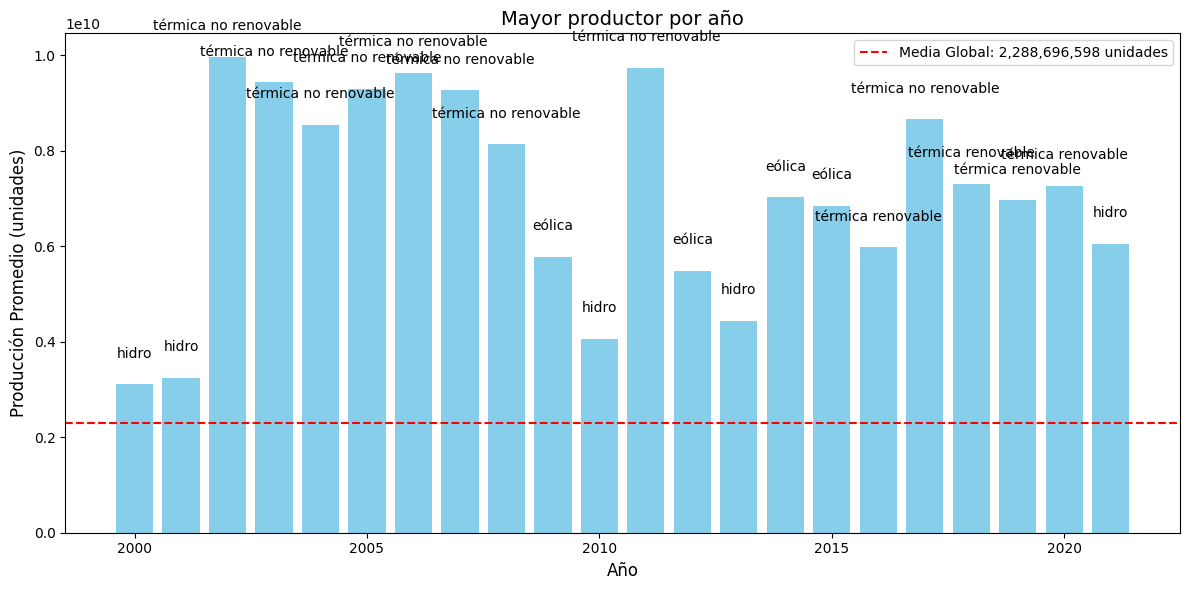

In [9]:
# 1. Agrupar por 'Año' y 'Nombre Fuente' y calcular el promedio de 'Produccion'
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()

# 2. Filtrar para eliminar registros donde 'Nombre Fuente' sea "otros"
promedio_produccion = promedio_produccion[promedio_produccion['Nombre Fuente'] != 'otros']

# 3. Calcular la media global de producción (opcional, para marcarla en el gráfico)
media_produccion = promedio_produccion['Produccion'].mean()

# Para cada año se toma el índice donde 'Produccion' es máxima
max_por_ano = promedio_produccion.loc[promedio_produccion.groupby('Año')['Produccion'].idxmax()]

plt.figure(figsize=(12, 6))

# Graficar las barras: cada barra representa el mayor productor de ese año
plt.bar(max_por_ano['Año'], max_por_ano['Produccion'], color='skyblue')

# Agregar etiquetas sobre cada barra indicando el 'Nombre Fuente'
for index, row in max_por_ano.iterrows():
    plt.text(row['Año'], row['Produccion'] + 0.05 * max_por_ano['Produccion'].max(),
             row['Nombre Fuente'], ha='center', va='bottom', fontsize=10)

# Agregar una línea horizontal que muestra la media global de producción (opcional)
plt.axhline(y=media_produccion, color='red', linestyle='--',
            label=f'Media Global: {media_produccion:,.0f} unidades')

# Personalizar la gráfica
plt.title('Mayor productor por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Promedio (unidades)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

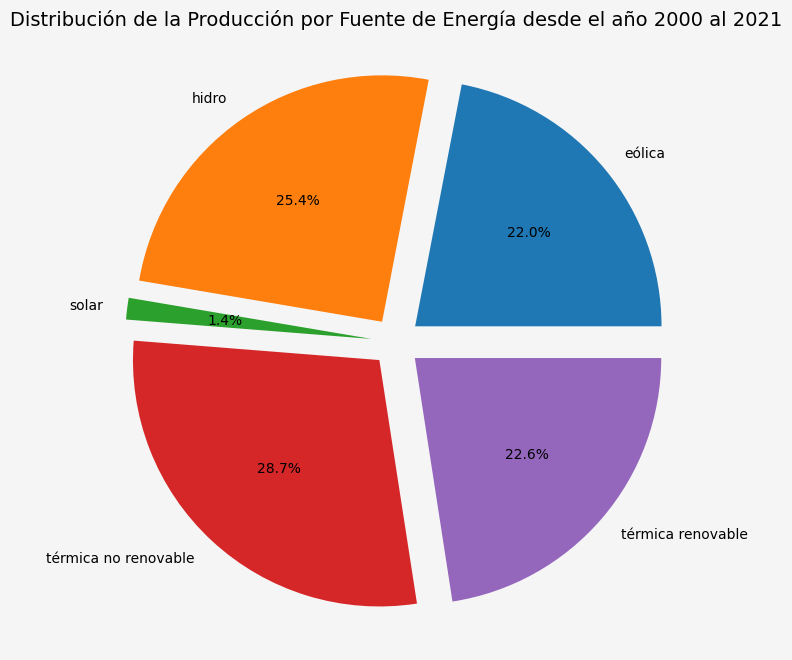

In [10]:
produccion_por_fuente = promedio_produccion.groupby('Nombre Fuente')['Produccion'].apply(
    lambda x: x.str.replace('K', '').str.replace(',', '').astype(float).sum() if x.dtype == 'O' else x.sum()
).reset_index()

# Filtrar y asignar al DataFrame solo las filas donde 'Produccion' es mayor a 0.0
produccion_por_fuente = produccion_por_fuente[produccion_por_fuente['Produccion'] > 0.0]


# Paso 2: Crear la torta
##plt.figure(figsize=(8, 8))
##plt.pie(produccion_por_fuente['Produccion'], labels=produccion_por_fuente['Nombre Fuente'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.figure(figsize=(8, 8) , facecolor='whitesmoke')
plt.pie(produccion_por_fuente['Produccion'], labels=produccion_por_fuente['Nombre Fuente'],explode=(0.1,0.1,0.1,0.1,0.1),autopct='%1.1f%%')
plt.grid(True)

# Paso 3: Personalizar el gráfico
plt.title('Distribución de la Producción por Fuente de Energía desde el año 2000 al 2021', fontsize=14)


# Mostrar el gráfico
plt.show()

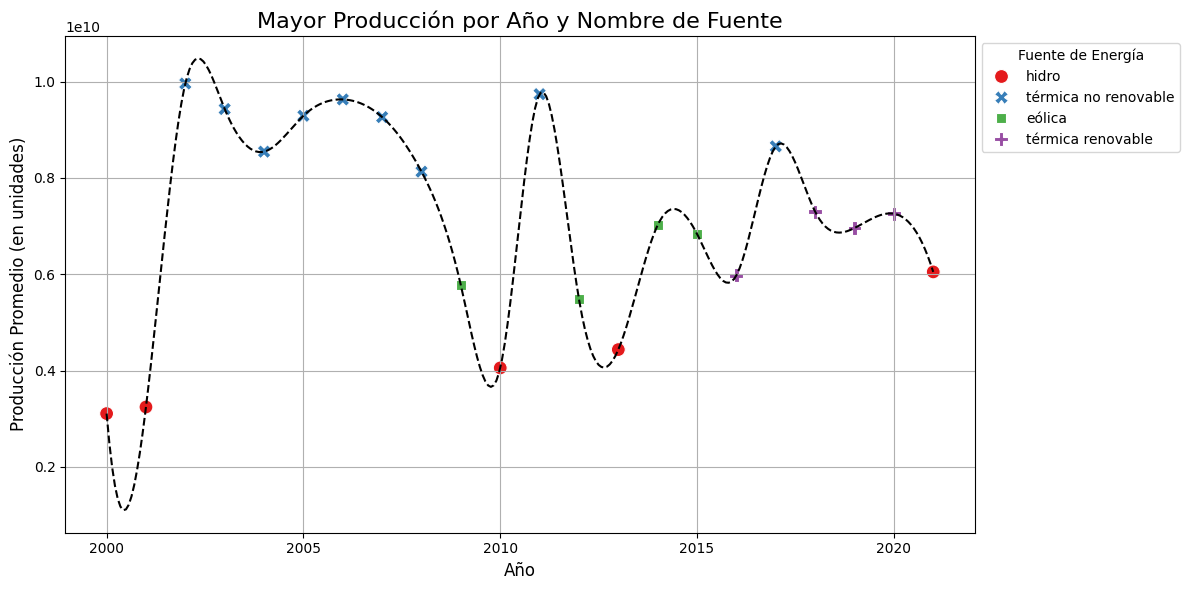

In [11]:

# Paso 1: Agrupar los datos por 'Año' y 'Nombre Fuente' y calcular el promedio de producción
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()

# Paso 2: Encontrar la fuente con la mayor producción por cada año
max_produccion = promedio_produccion.loc[promedio_produccion.groupby('Año')['Produccion'].idxmax()]

# Paso 3: Crear la gráfica de dispersión usando Seaborn
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

sns.scatterplot(data=max_produccion,
                x='Año',
                y='Produccion',
                hue='Nombre Fuente',  # Colorear los puntos según la fuente
                style='Nombre Fuente',  # Diferenciar los puntos por el estilo
                s=100,  # Tamaño de los puntos
                palette='Set1'
                )  # Elegir la paleta de colores para los puntos

# Extraer los valores de 'Año' y 'Produccion'
x = max_produccion['Año'].values
y = max_produccion['Produccion'].values

# Paso 4: Interpolar para suavizar la línea
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_new)

# Trazar la línea suavizada
plt.plot(x_new, y_smooth, color='black', linestyle='--', linewidth=1.5)

# Paso 4: Personalizar el gráfico
plt.grid(True)
plt.title('Mayor Producción por Año y Nombre de Fuente', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Promedio (en unidades)', fontsize=12)
plt.legend(title="Fuente de Energía", loc='upper left', bbox_to_anchor=(1, 1))  # Leyenda

# Ajustar el layout para evitar que los elementos se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


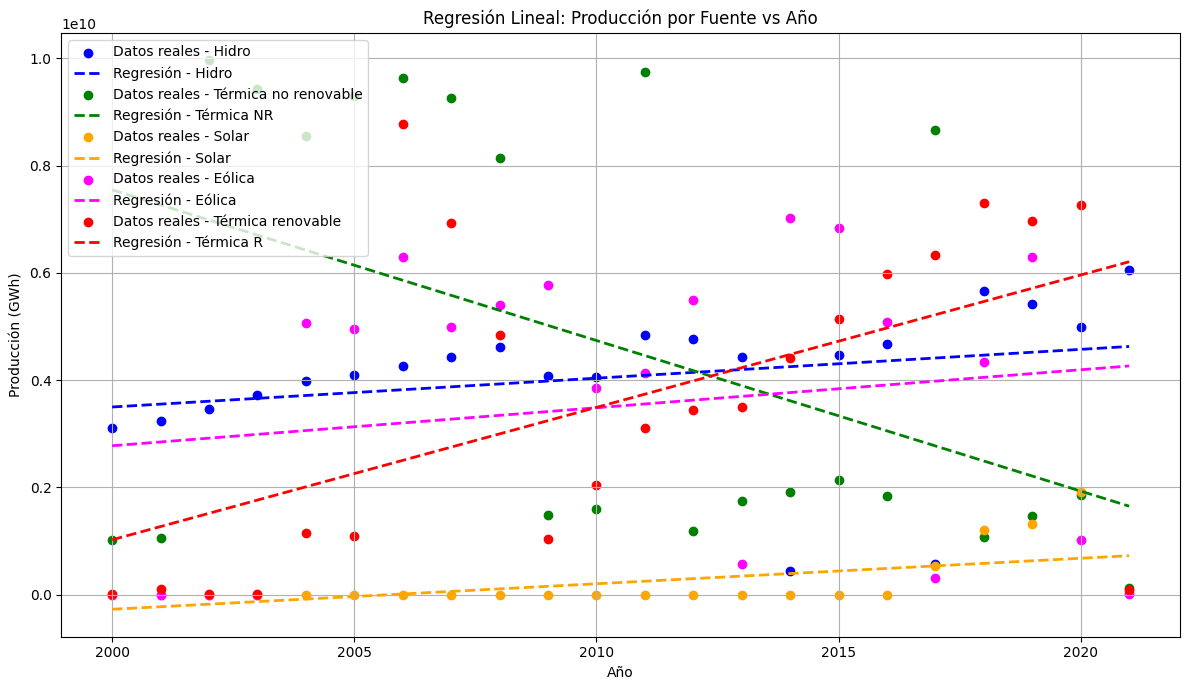

Modelo para Hidro:
  Pendiente: 53,727,229.65 GWh/año
  Intercepto: -103,956,147,914.52 GWh

Modelo para Térmica No Renovable:
  Pendiente: -280,795,331.72 GWh/año
  Intercepto: 569,136,612,030.37 GWh

Modelo para Solar:
  Pendiente: 47,567,264.65 GWh/año
  Intercepto: -95,407,109,888.16 GWh

Modelo para Eólica:
  Pendiente: 70,833,515.96 GWh/año
  Intercepto: -138,891,105,008.44 GWh

Modelo para Térmica Renovable:
  Pendiente: 246,809,473.84 GWh/año
  Intercepto: -492,596,170,392.68 GWh



In [21]:
# 1. Agrupar por Año y Fuente y calcular la producción promedio
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()

# 2. Filtrar los datos para cada fuente y ordenar por Año (incluyendo térmica renovable)
promo_hidro = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'hidro'].sort_values('Año')
promo_termica_nr = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'térmica no renovable'].sort_values('Año')
promo_solar = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'solar'].sort_values('Año')
promo_eolica = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'eólica'].sort_values('Año')
promo_termica_r = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'térmica renovable'].sort_values('Año')

# 3. Ajustar la regresión lineal para cada fuente

# Regresión para Hidro
X_h = promo_hidro[['Año']].values  # Variable independiente (Año)
y_h = promo_hidro['Produccion'].values  # Variable dependiente (Producción)
modelo_h = LinearRegression()
modelo_h.fit(X_h, y_h)
y_pred_h = modelo_h.predict(X_h)

# Regresión para Térmica no renovable
X_t = promo_termica_nr[['Año']].values  # Variable independiente (Año)
y_t = promo_termica_nr['Produccion'].values  # Variable dependiente (Producción)
modelo_t = LinearRegression()
modelo_t.fit(X_t, y_t)
y_pred_t = modelo_t.predict(X_t)

# Regresión para Solar
X_s = promo_solar[['Año']].values  # Variable independiente (Año)
y_s = promo_solar['Produccion'].values  # Variable dependiente (Producción)
modelo_s = LinearRegression()
modelo_s.fit(X_s, y_s)
y_pred_s = modelo_s.predict(X_s)

# Regresión para Eólica
X_e = promo_eolica[['Año']].values  # Variable independiente (Año)
y_e = promo_eolica['Produccion'].values  # Variable dependiente (Producción)
modelo_e = LinearRegression()
modelo_e.fit(X_e, y_e)
y_pred_e = modelo_e.predict(X_e)

# Regresión para Térmica renovable
X_tr = promo_termica_r[['Año']].values  # Variable independiente
y_tr = promo_termica_r['Produccion'].values  # Variable dependiente
modelo_tr = LinearRegression()
modelo_tr.fit(X_tr, y_tr)
y_pred_tr = modelo_tr.predict(X_tr)

# 4. Graficar los puntos reales y las líneas de regresión para cada fuente en una sola figura
plt.figure(figsize=(12, 7))

# Fuente Hidro
plt.scatter(X_h, y_h, color='blue', label='Datos reales - Hidro')
plt.plot(X_h, y_pred_h, color='blue', linestyle='--', linewidth=2, label='Regresión - Hidro')

# Fuente Térmica no renovable
plt.scatter(X_t, y_t, color='green', label='Datos reales - Térmica no renovable')
plt.plot(X_t, y_pred_t, color='green', linestyle='--', linewidth=2, label='Regresión - Térmica NR')

# Fuente Solar
plt.scatter(X_s, y_s, color='orange', label='Datos reales - Solar')
plt.plot(X_s, y_pred_s, color='orange', linestyle='--', linewidth=2, label='Regresión - Solar')

# Fuente Eólica
plt.scatter(X_e, y_e, color='magenta', label='Datos reales - Eólica')
plt.plot(X_e, y_pred_e, color='magenta', linestyle='--', linewidth=2, label='Regresión - Eólica')

# Fuente Térmica renovable
plt.scatter(X_tr, y_tr, color='red', label='Datos reales - Térmica renovable')
plt.plot(X_tr, y_pred_tr, color='red', linestyle='--', linewidth=2, label='Regresión - Térmica R')

plt.xlabel('Año')
plt.ylabel('Producción (GWh)')
plt.title('Regresión Lineal: Producción por Fuente vs Año')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Mostrar coeficientes de cada modelo (incluyendo térmica renovable)
print("Modelo para Hidro:")
print(f"  Pendiente: {modelo_h.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_h.intercept_:,.2f} GWh\n")

print("Modelo para Térmica No Renovable:")
print(f"  Pendiente: {modelo_t.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_t.intercept_:,.2f} GWh\n")

print("Modelo para Solar:")
print(f"  Pendiente: {modelo_s.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_s.intercept_:,.2f} GWh\n")

print("Modelo para Eólica:")
print(f"  Pendiente: {modelo_e.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_e.intercept_:,.2f} GWh\n")

print("Modelo para Térmica Renovable:")
print(f"  Pendiente: {modelo_tr.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_tr.intercept_:,.2f} GWh\n")


In [ ]:
dataFrameZNI = pd.read_csv('/content/drive/MyDrive/ProyectoAnalisisDatos/Datos/Datagit/ZonasNoInterconectadas.csv', sep=';',encoding='ISO-8859-1')

dataFrameZNI

IdZonaNC        NombreDepartamento NombreMunicipio  Anio        Mes  \
0            3                  amazonas         leticia  2024      enero   
1           82                  amazonas         leticia  2023      enero   
2           83                  amazonas      el encanto  2023      enero   
3          126                  amazonas         leticia  2022      enero   
4          127                  amazonas      el encanto  2022      enero   
...        ...                       ...             ...   ...        ...   
2812      2567  san andrés y providencia     la victoria  2024  diciembre   
2813      2568  san andrés y providencia      la pedrera  2022  diciembre   
2814      2569  san andrés y providencia     la victoria  2022  diciembre   
2815      2570  san andrés y providencia      la pedrera  2021  diciembre   
2816      2571  san andrés y providencia     la victoria  2021  diciembre   

      EnergiaActiva  EnergiaReactiva  DiaDemandaMaxima  PotenciaMaxima  \
0         4059520.0        1044020.0                 1        758108.0   
1         3696990.0        1065330.0                27        713296.0   
2          112349.0          39609.0                24         22898.0   
3         3835280.0        1145150.0                19         71715.0   
4          104004.0          37309.0                 1         22722.0   
...             ...              ...               ...             ...   
2812     18531600.0        4696480.0                12       3109110.0   
2813      1138530.0         254554.0                16        182572.0   
2814     17303100.0        4700360.0                16       2916410.0   
2815      1000210.0         268745.0                12        172719.0   
2816     17345300.0        4825620.0                30        289534.0   

     FechaDemandaMaxima  PromedioDiarioHoras  
0             1/03/2024                24.00  
1            27/01/2023                24.00  
2            24/01/2023                23.59  
3            19/01/2022                24.00  
4             1/05/2022                23.55  
...                 ...                  ...  
2812         12/11/2024                23.99  
2813         16/12/2022                24.00  
2814         16/12/2022                23.59  
2815         12/06/2021                24.00  
2816         30/12/2021                23.59  

[2817 rows x 11 columns]

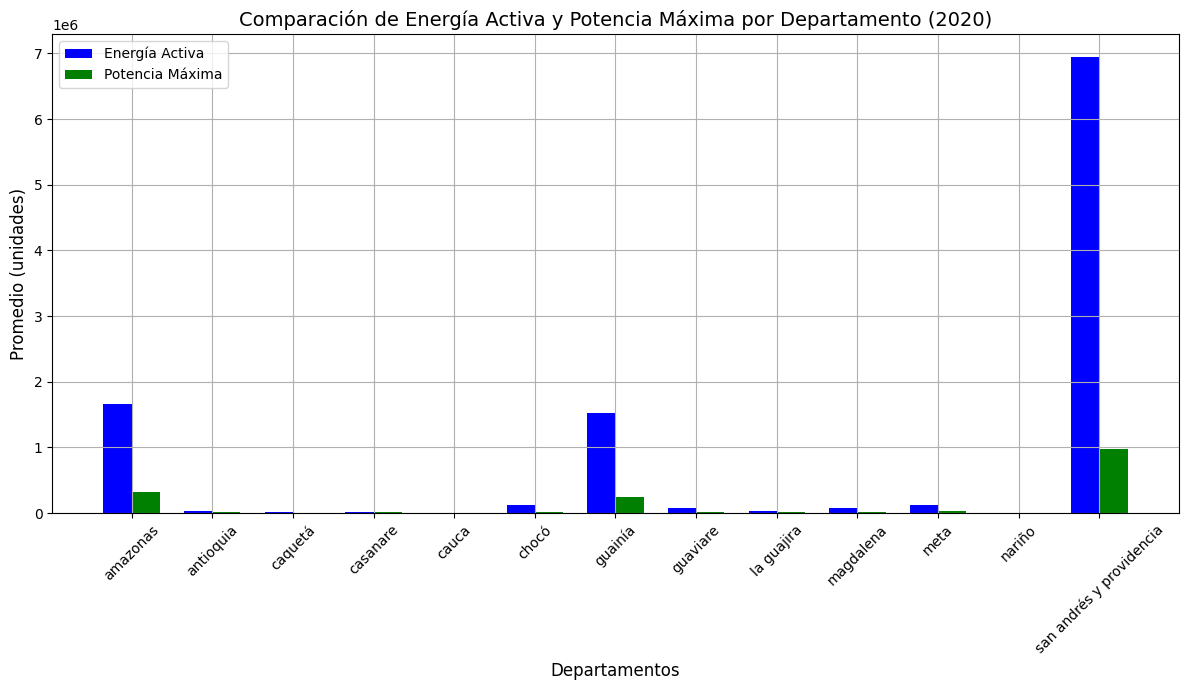

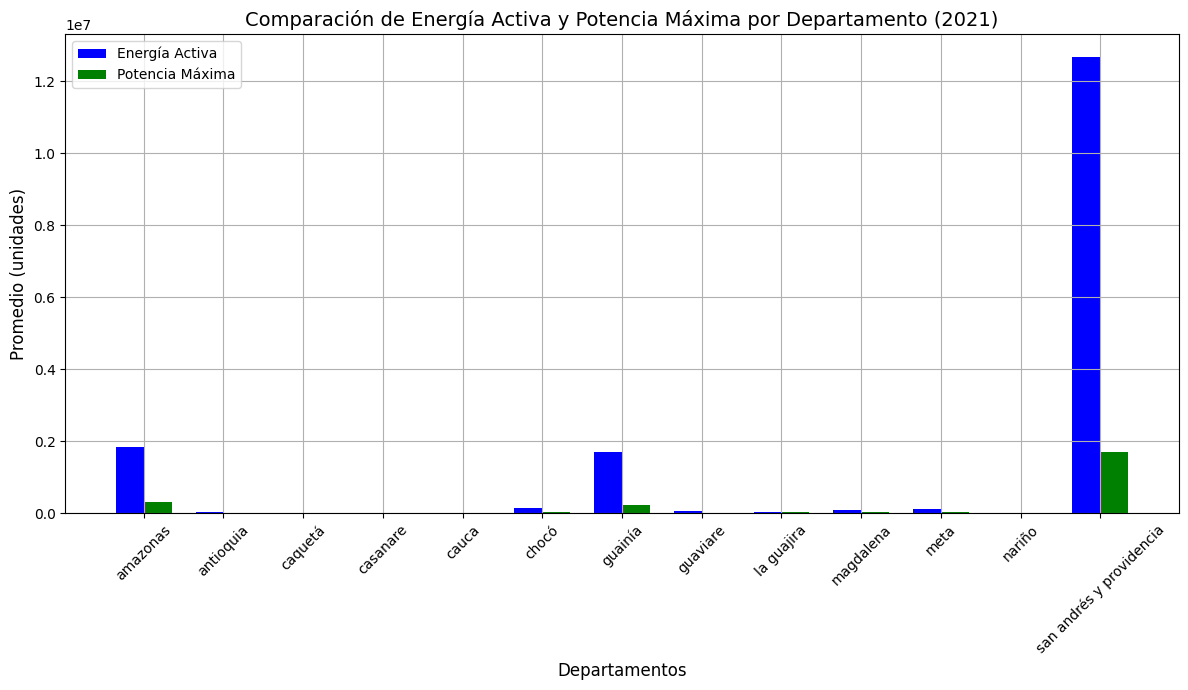

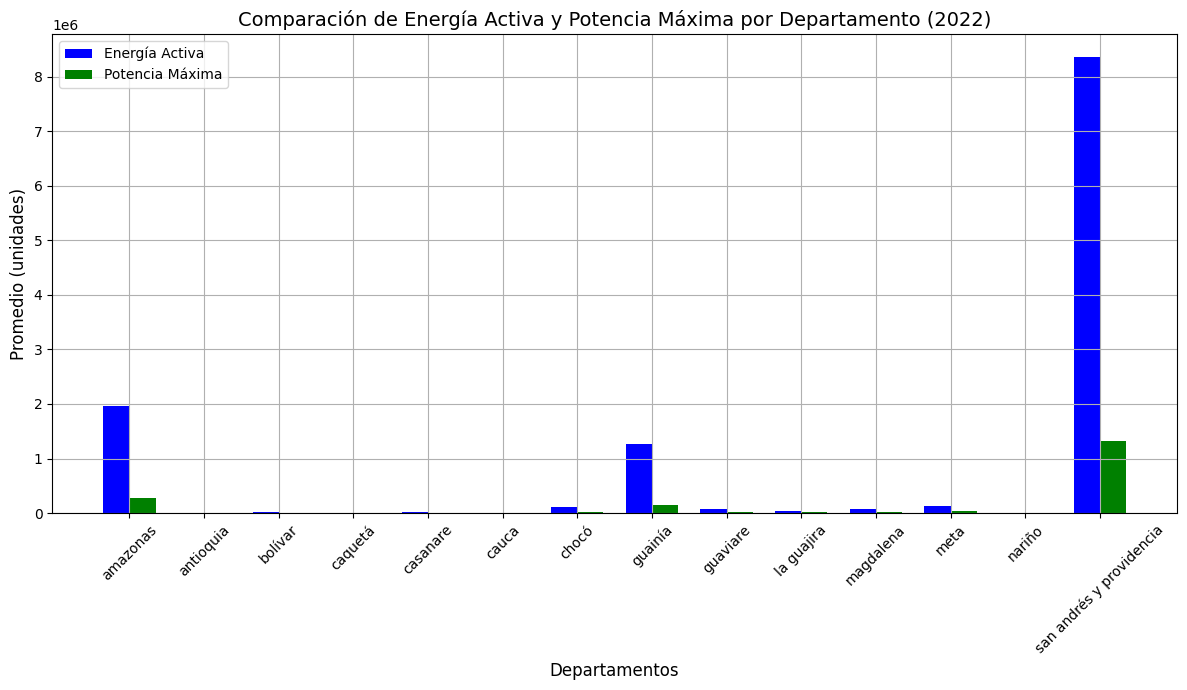

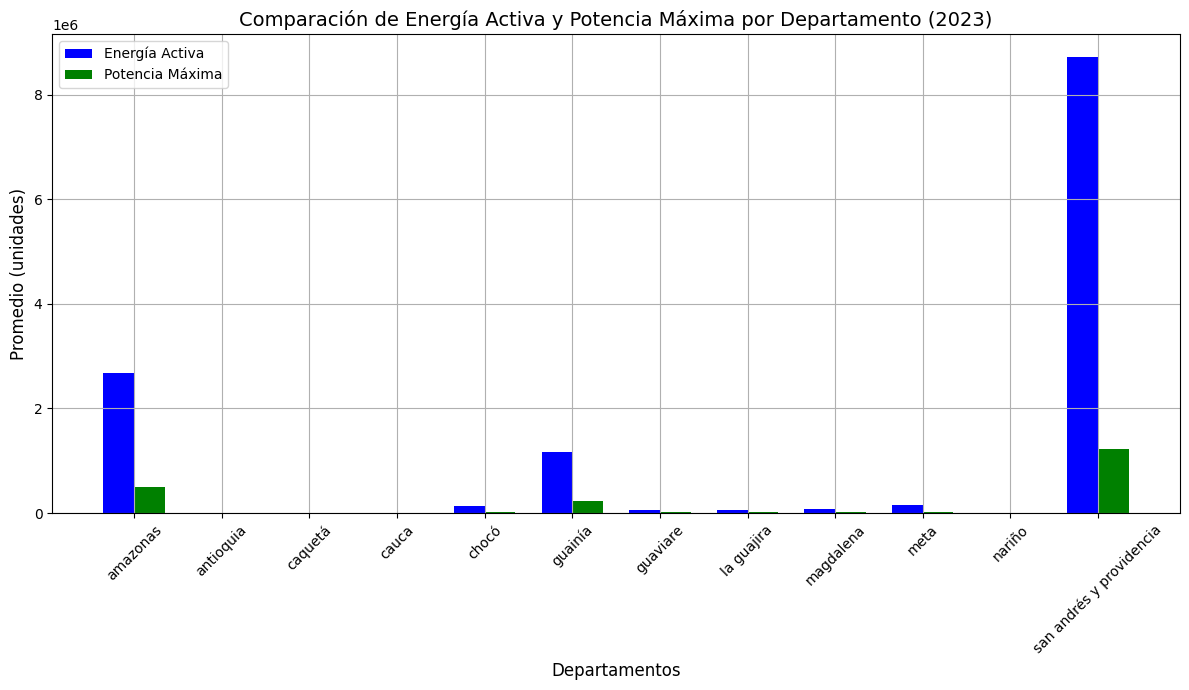

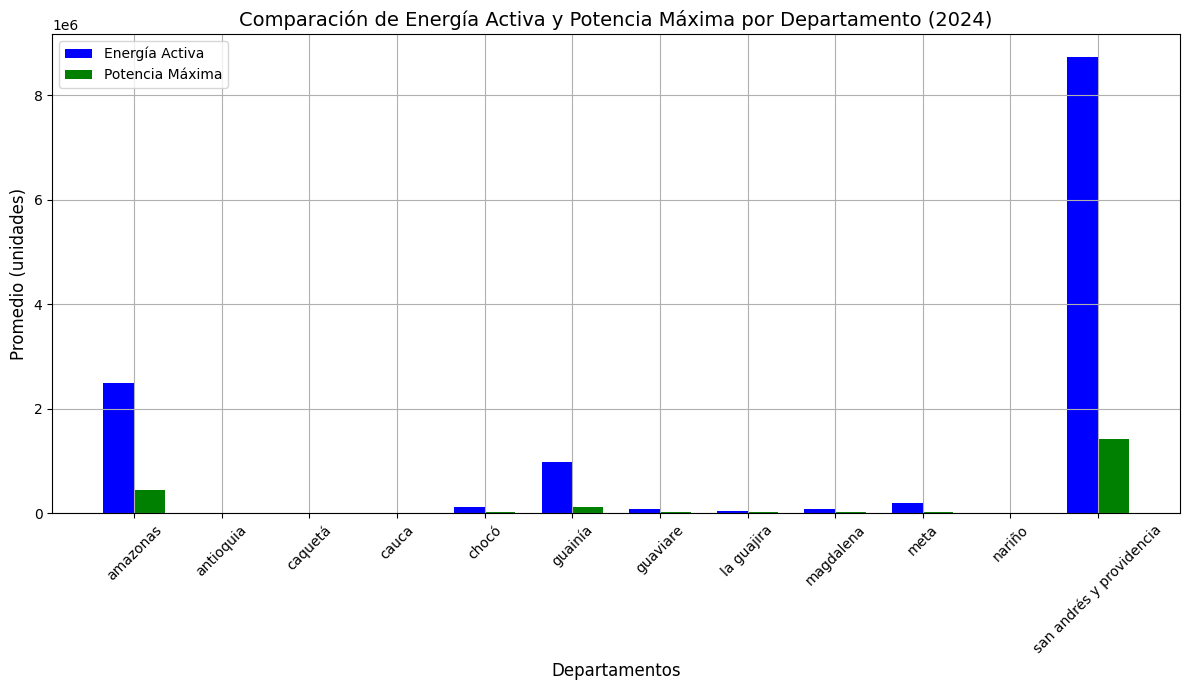

In [ ]:
# Agrupar los datos por Año y Departamento, y calcular el promedio de Energía Activa y Potencia Máxima
data_agrupada_ano_departamento = dataFrameZNI.groupby(['Anio', 'NombreDepartamento'])[['EnergiaActiva', 'PotenciaMaxima']].mean().reset_index()

# Iterar sobre los años para generar gráficos por separado
anios = data_agrupada_ano_departamento['Anio'].unique()

for anio in anios:
    # Filtrar los datos para el año específico
    data_anio = data_agrupada_ano_departamento[data_agrupada_ano_departamento['Anio'] == anio]

    # Departamentos correspondientes al año
    departamentos = data_anio['NombreDepartamento']
    departamentos_pos = range(len(departamentos))
    bar_width = 0.35

    # Crear la gráfica de barras
    plt.figure(figsize=(12, 7))
    plt.bar(departamentos_pos, data_anio['EnergiaActiva'], width=bar_width, color='blue', label='Energía Activa')
    plt.bar([pos + bar_width for pos in departamentos_pos], data_anio['PotenciaMaxima'], width=bar_width, color='green', label='Potencia Máxima')

    # Estilo de la gráfica
    plt.xlabel('Departamentos', fontsize=12)
    plt.ylabel('Promedio (unidades)', fontsize=12)
    plt.title(f'Comparación de Energía Activa y Potencia Máxima por Departamento ({anio})', fontsize=14)
    plt.xticks([pos + bar_width / 2 for pos in departamentos_pos], departamentos, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

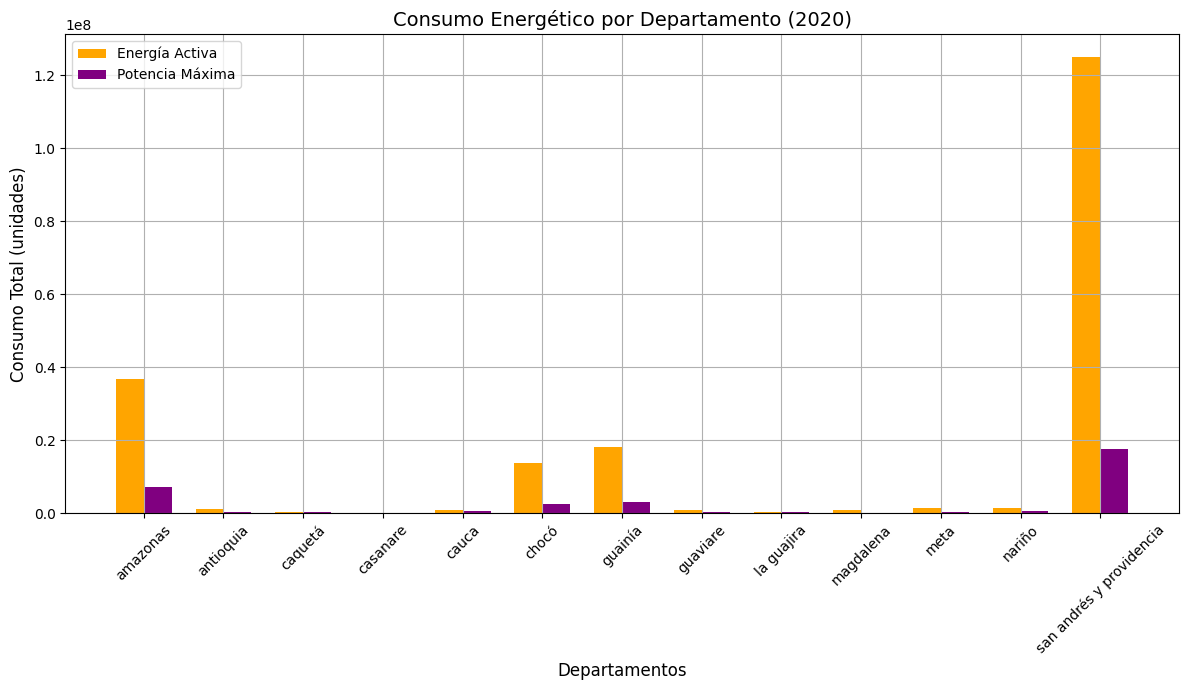

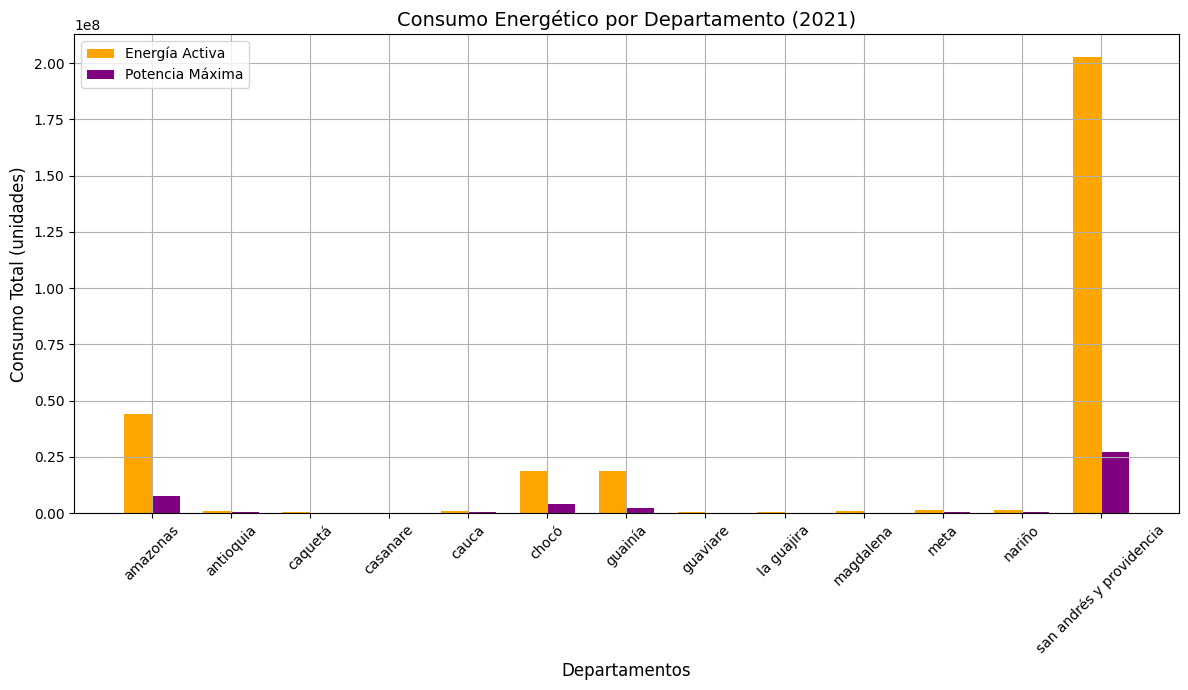

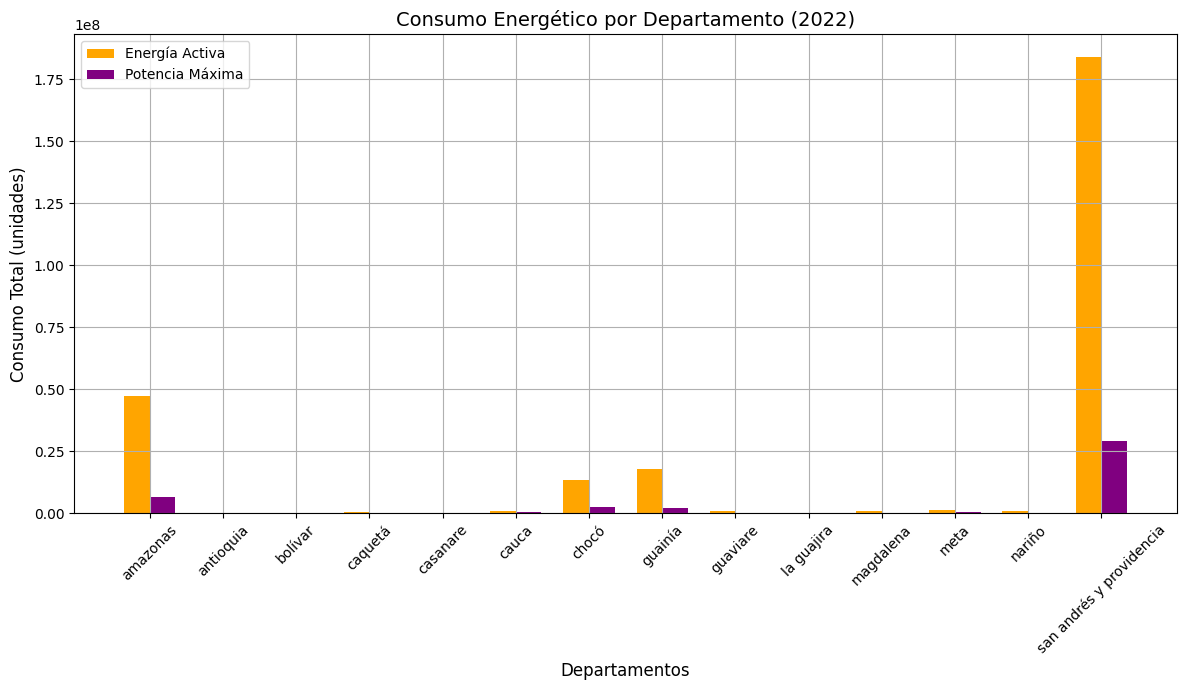

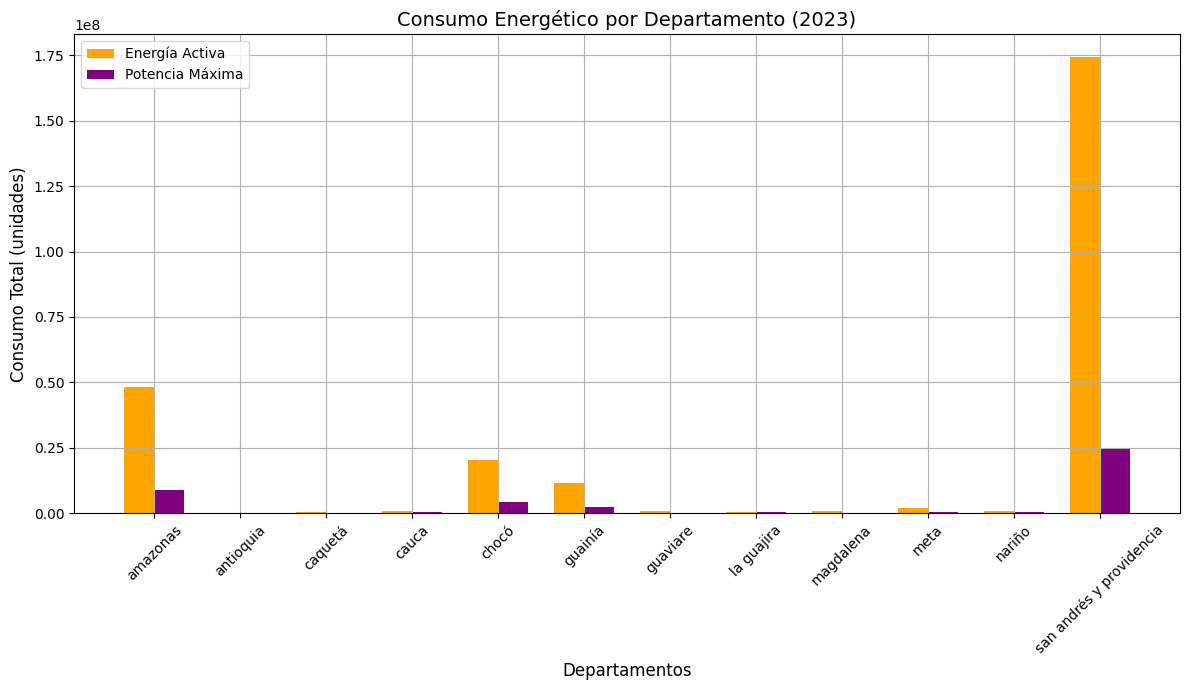

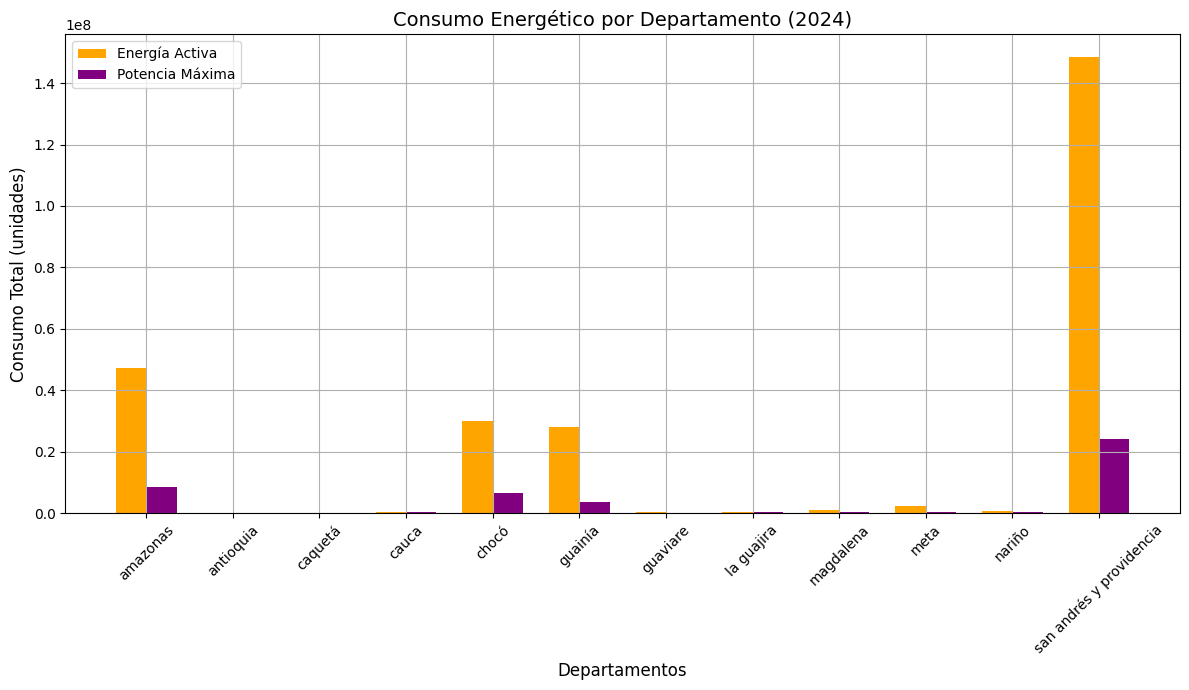

In [ ]:
# Agrupar por Año y Departamento, calcular suma de Energía Activa y Potencia Máxima
data_agrupada_ano_departamento = dataFrameZNI.groupby(['Anio', 'NombreDepartamento'])[['EnergiaActiva', 'PotenciaMaxima']].sum().reset_index()

# Iterar sobre los años para generar gráficos por separado
anios = data_agrupada_ano_departamento['Anio'].unique()

for anio in anios:
    # Filtrar los datos para el año específico
    data_anio = data_agrupada_ano_departamento[data_agrupada_ano_departamento['Anio'] == anio]

    # Departamentos correspondientes al año
    departamentos = data_anio['NombreDepartamento']
    departamentos_pos = range(len(departamentos))
    bar_width = 0.35

    # Crear la gráfica de barras
    plt.figure(figsize=(12, 7))
    plt.bar(departamentos_pos, data_anio['EnergiaActiva'], width=bar_width, color='orange', label='Energía Activa')
    plt.bar([pos + bar_width for pos in departamentos_pos], data_anio['PotenciaMaxima'], width=bar_width, color='purple', label='Potencia Máxima')

    # Estilo de la gráfica
    plt.xlabel('Departamentos', fontsize=12)
    plt.ylabel('Consumo Total (unidades)', fontsize=12)
    plt.title(f'Consumo Energético por Departamento ({anio})', fontsize=14)
    plt.xticks([pos + bar_width / 2 for pos in departamentos_pos], departamentos, rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

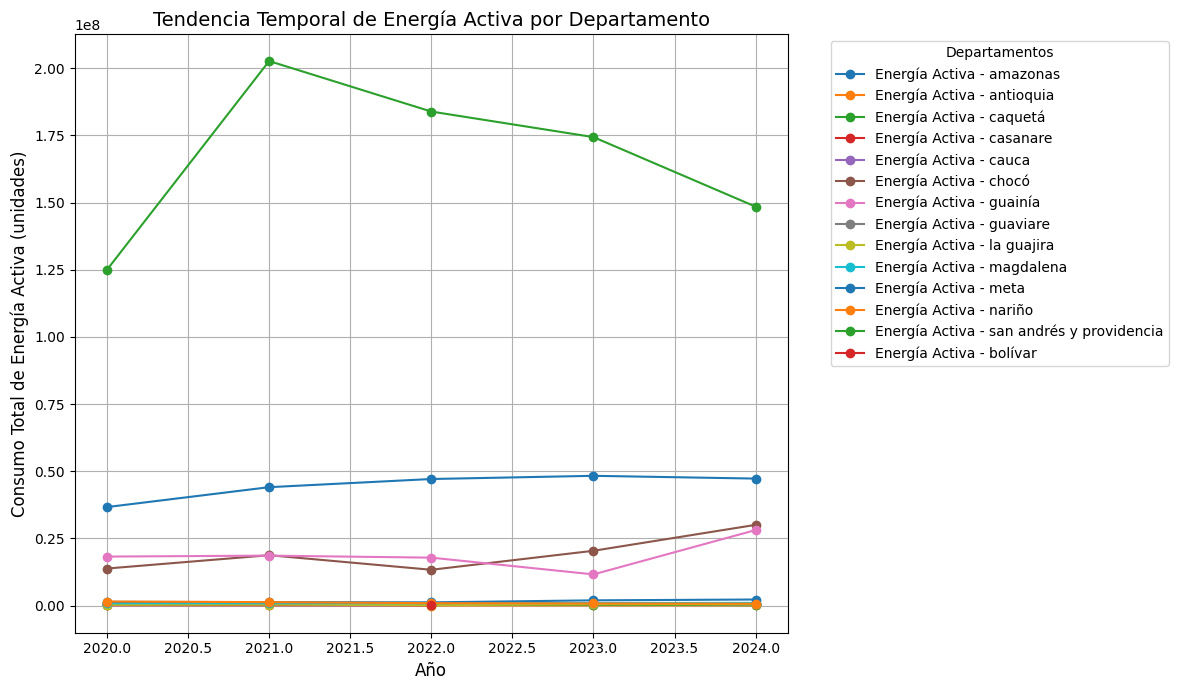

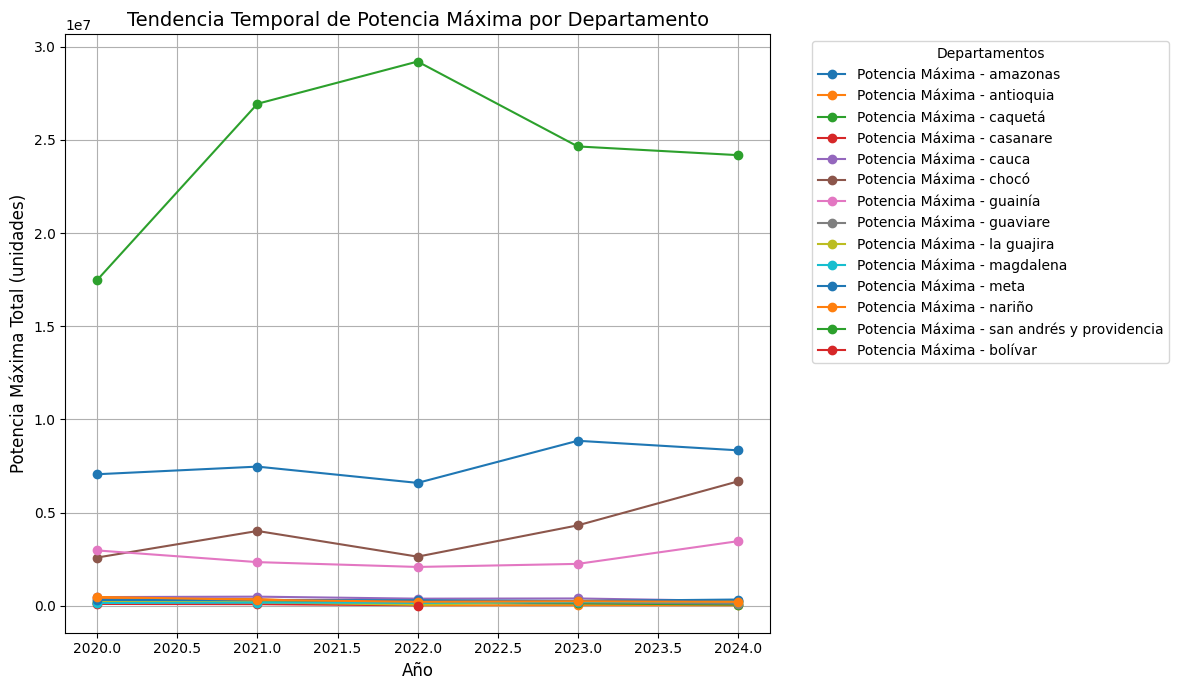

In [ ]:
# Supongamos que ya tienes cargado el dataFrameZNI
# dataFrameZNI = pd.read_csv('/content/drive/MyDrive/ProyectoAnalisisDatos/Datos/Datagit/ZonasNoInterconectadas.csv', sep=';', encoding='ISO-8859-1')

# Agrupar por Año y Departamento, y calcular el total de Energía Activa y Potencia Máxima
data_tendencia_departamento = dataFrameZNI.groupby(['Anio', 'NombreDepartamento'])[['EnergiaActiva', 'PotenciaMaxima']].sum().reset_index()

# Crear la gráfica de líneas para cada departamento
plt.figure(figsize=(12, 7))

# Iterar sobre cada departamento para trazar su tendencia
departamentos = data_tendencia_departamento['NombreDepartamento'].unique()
for departamento in departamentos:
    # Filtrar datos para el departamento específico
    datos_departamento = data_tendencia_departamento[data_tendencia_departamento['NombreDepartamento'] == departamento]
    # Crear la línea
    plt.plot(
        datos_departamento['Anio'],
        datos_departamento['EnergiaActiva'],
        marker='o',
        label=f'Energía Activa - {departamento}'
    )

# Estilo de la gráfica
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo Total de Energía Activa (unidades)', fontsize=12)
plt.title('Tendencia Temporal de Energía Activa por Departamento', fontsize=14)
plt.grid(True)
plt.legend(title='Departamentos', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del área principal
plt.tight_layout()
plt.show()

# Crear una segunda gráfica para la Potencia Máxima
plt.figure(figsize=(12, 7))
for departamento in departamentos:
    # Filtrar datos para el departamento específico
    datos_departamento = data_tendencia_departamento[data_tendencia_departamento['NombreDepartamento'] == departamento]
    # Crear la línea
    plt.plot(
        datos_departamento['Anio'],
        datos_departamento['PotenciaMaxima'],
        marker='o',
        label=f'Potencia Máxima - {departamento}'
    )

# Estilo de la gráfica
plt.xlabel('Año', fontsize=12)
plt.ylabel('Potencia Máxima Total (unidades)', fontsize=12)
plt.title('Tendencia Temporal de Potencia Máxima por Departamento', fontsize=14)
plt.grid(True)
plt.legend(title='Departamentos', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del área principal
plt.tight_layout()
plt.show()


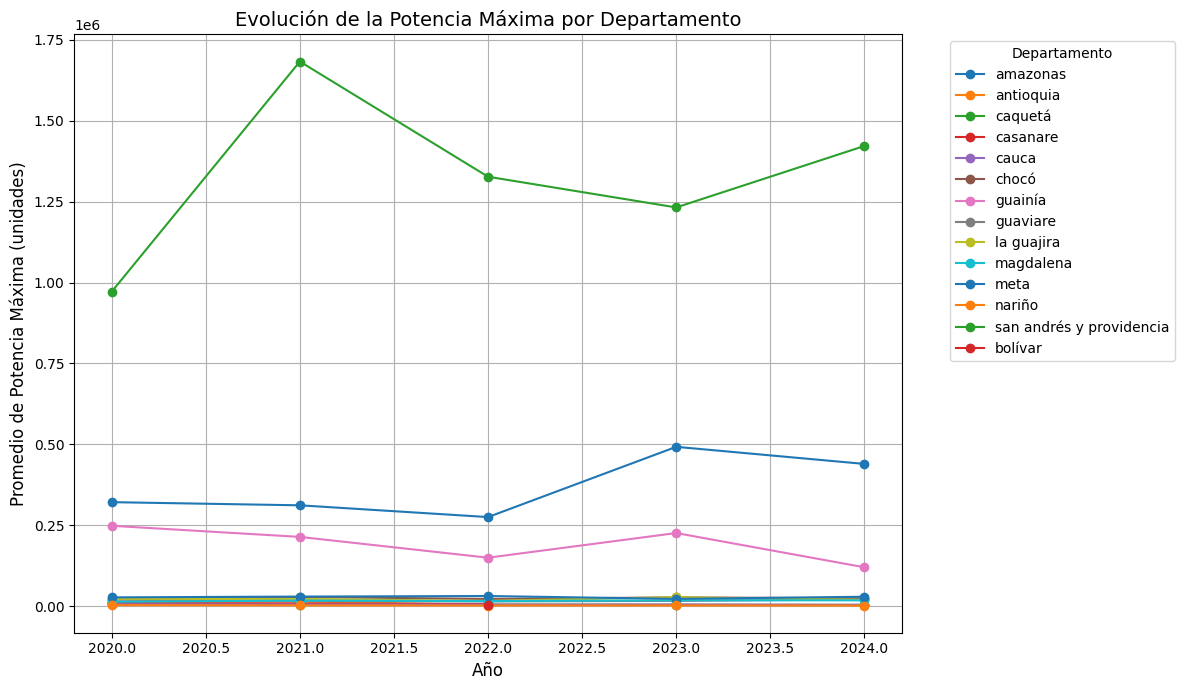

In [ ]:
# Agrupar los datos por Año y Municipio, y calcular el promedio de Potencia Máxima
data_tendencia_potencia = dataFrameZNI.groupby(['Anio', 'NombreDepartamento'])['PotenciaMaxima'].mean().reset_index()

# Crear la gráfica de líneas para cada municipio
plt.figure(figsize=(12, 7))

# Iterar sobre cada municipio para dibujar su tendencia
municipios = data_tendencia_potencia['NombreDepartamento'].unique()
for municipio in municipios:
    # Filtrar datos del municipio
    datos_municipio = data_tendencia_potencia[data_tendencia_potencia['NombreDepartamento'] == municipio]
    # Crear la línea
    plt.plot(datos_municipio['Anio'], datos_municipio['PotenciaMaxima'], marker='o', label=municipio)

# Estilo de la gráfica
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Potencia Máxima (unidades)', fontsize=12)
plt.title('Evolución de la Potencia Máxima por Departamento', fontsize=14)
plt.grid(True)
plt.legend(title='Departamento', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del área principal
plt.tight_layout()
plt.show()


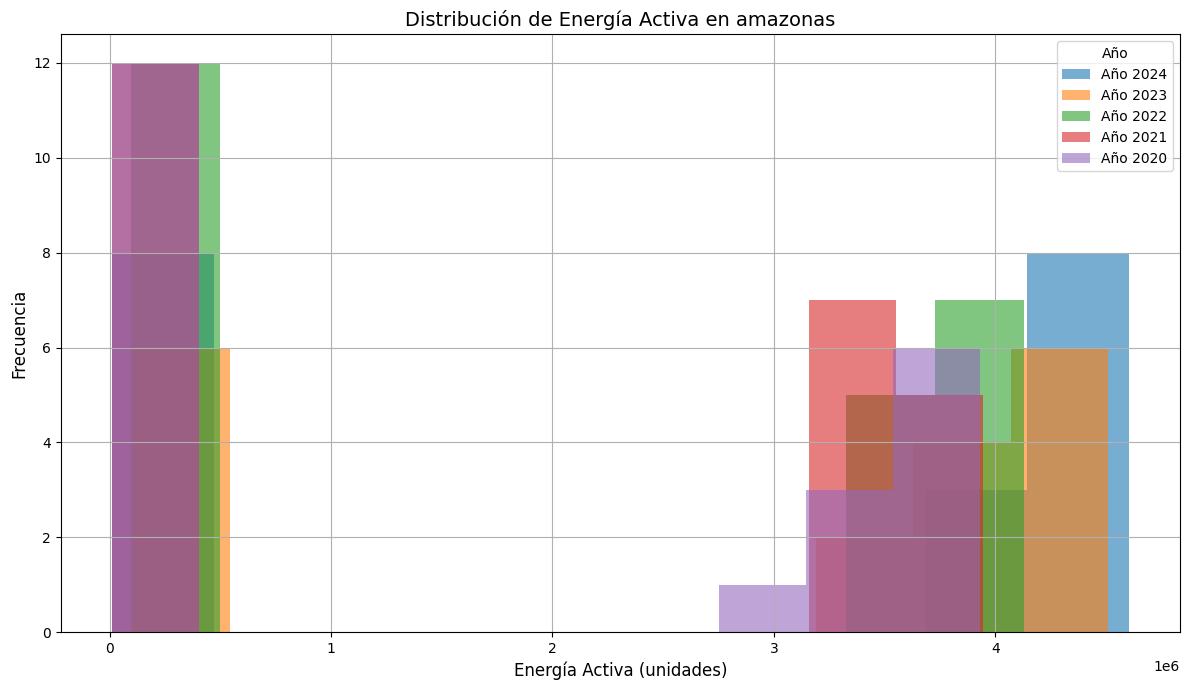

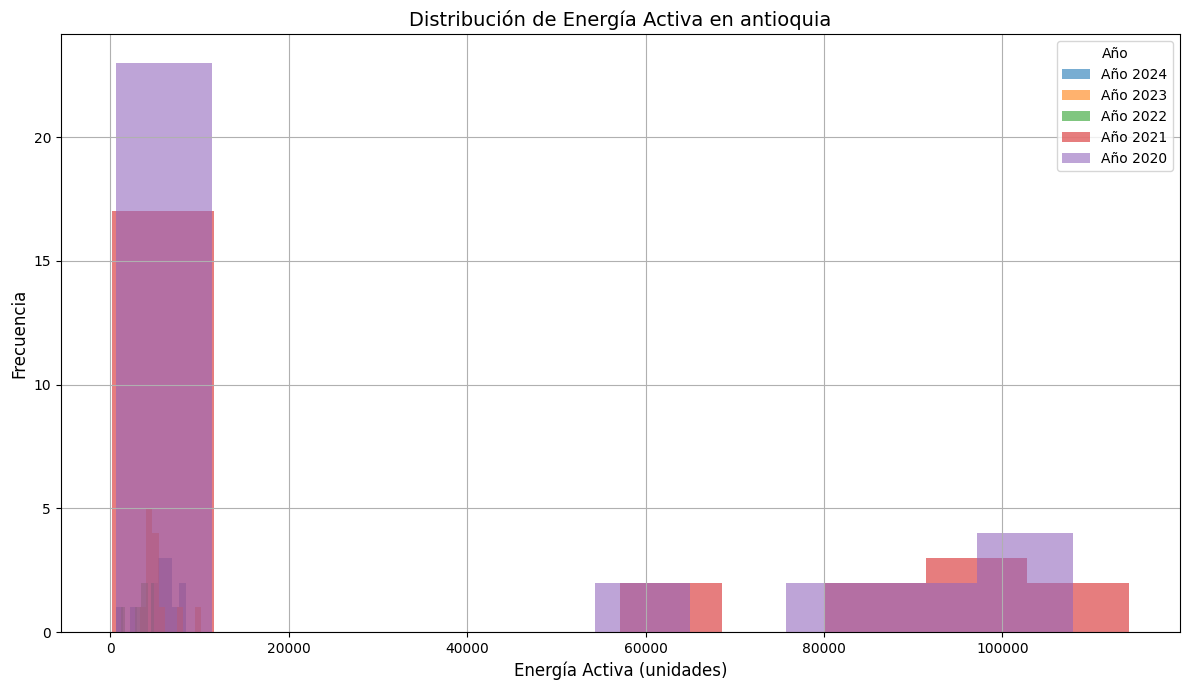

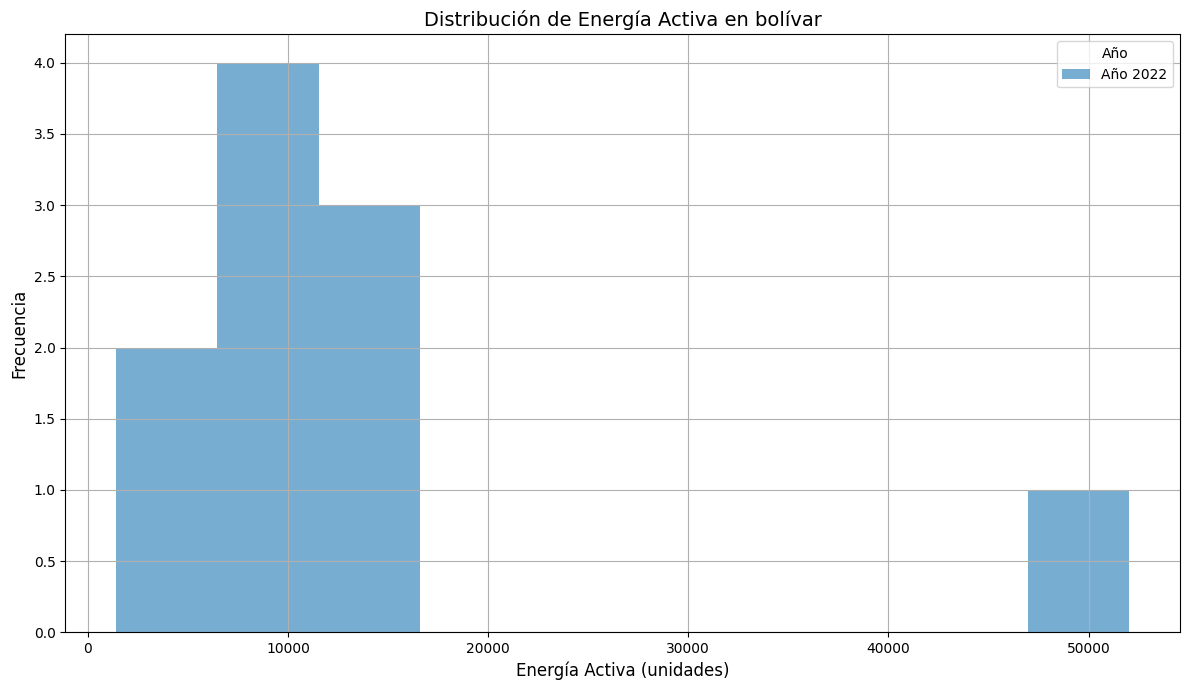

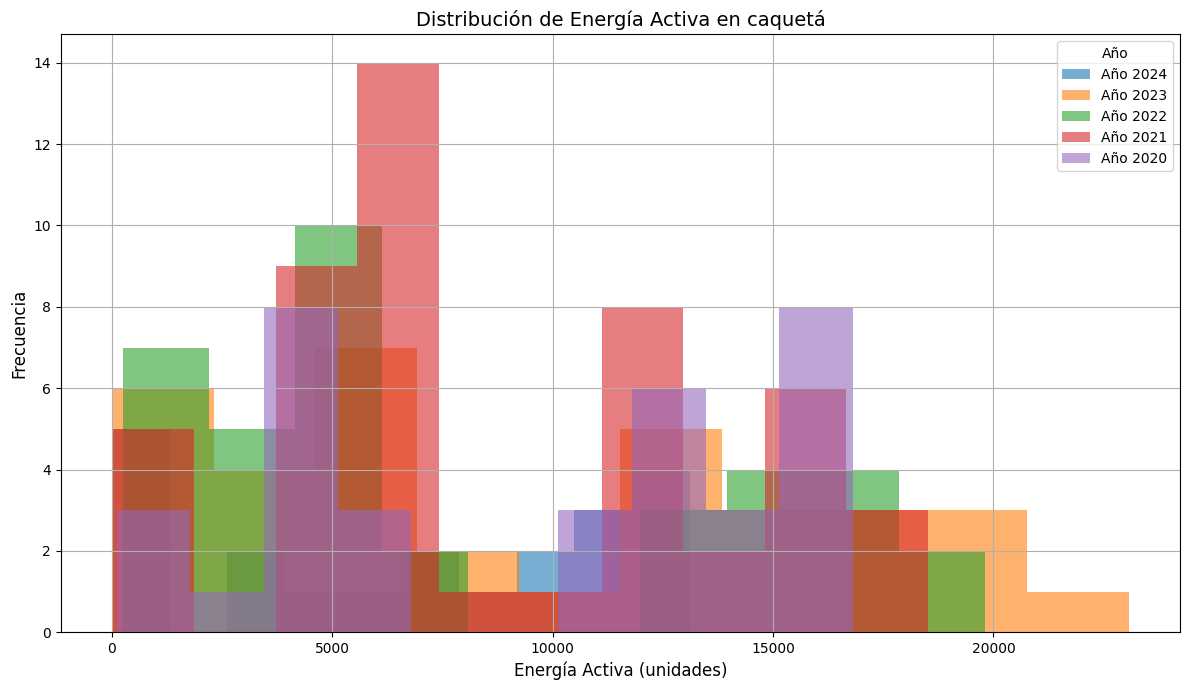

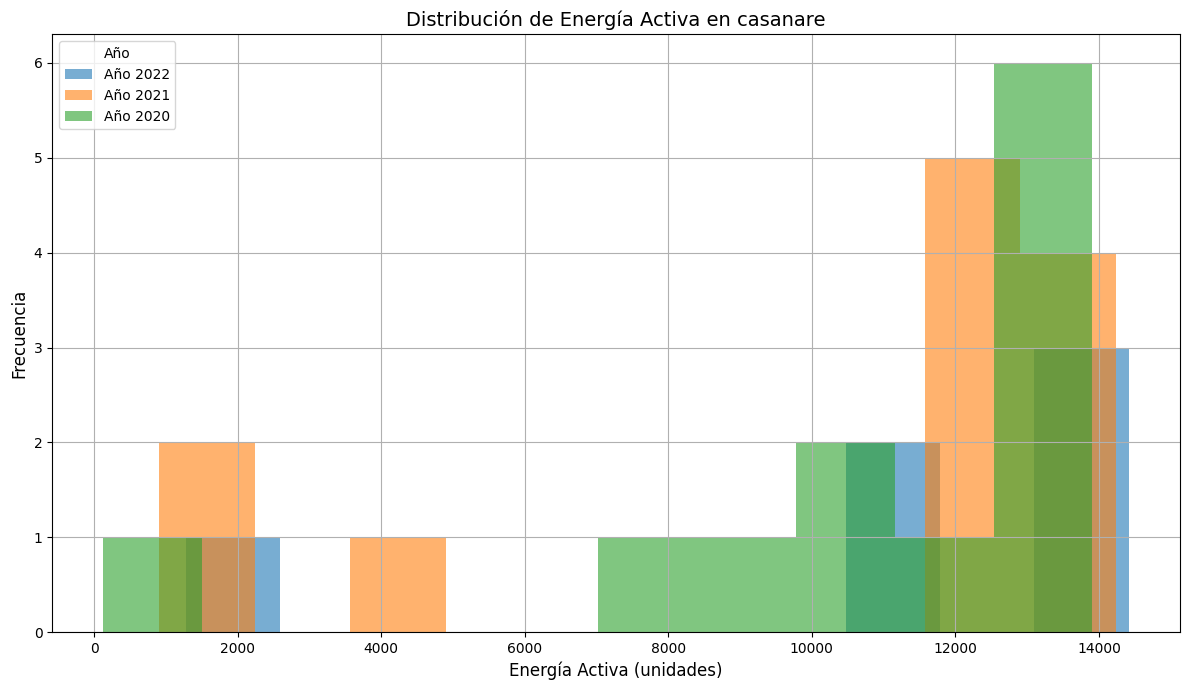

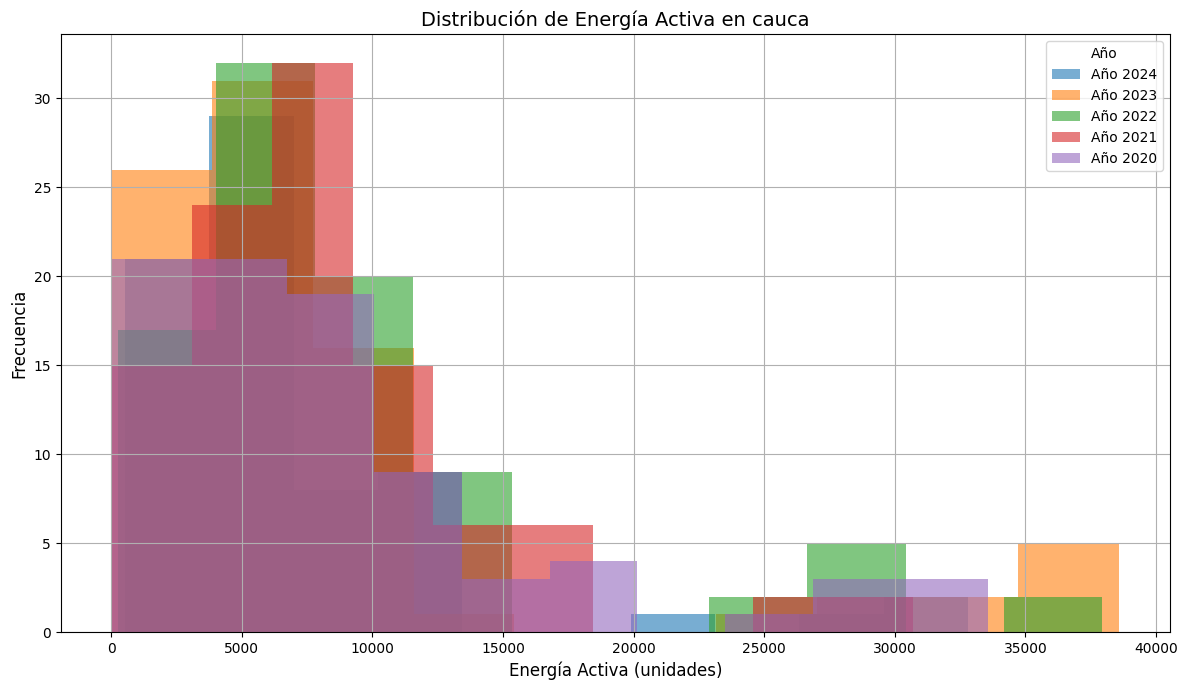

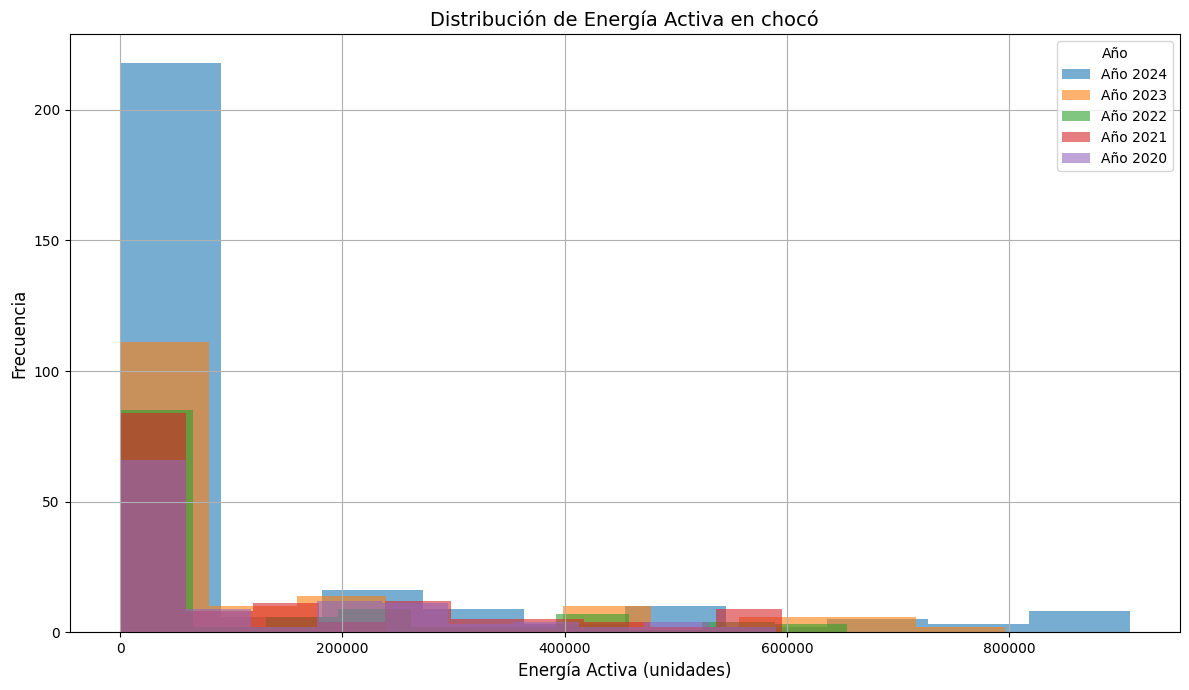

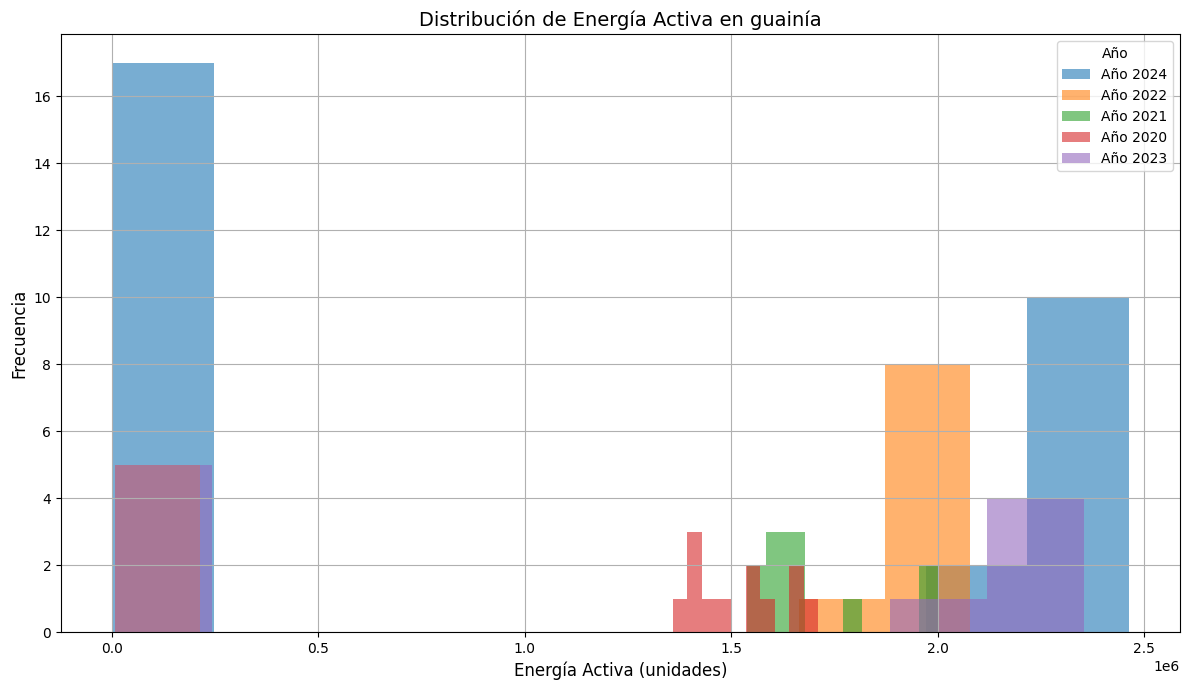

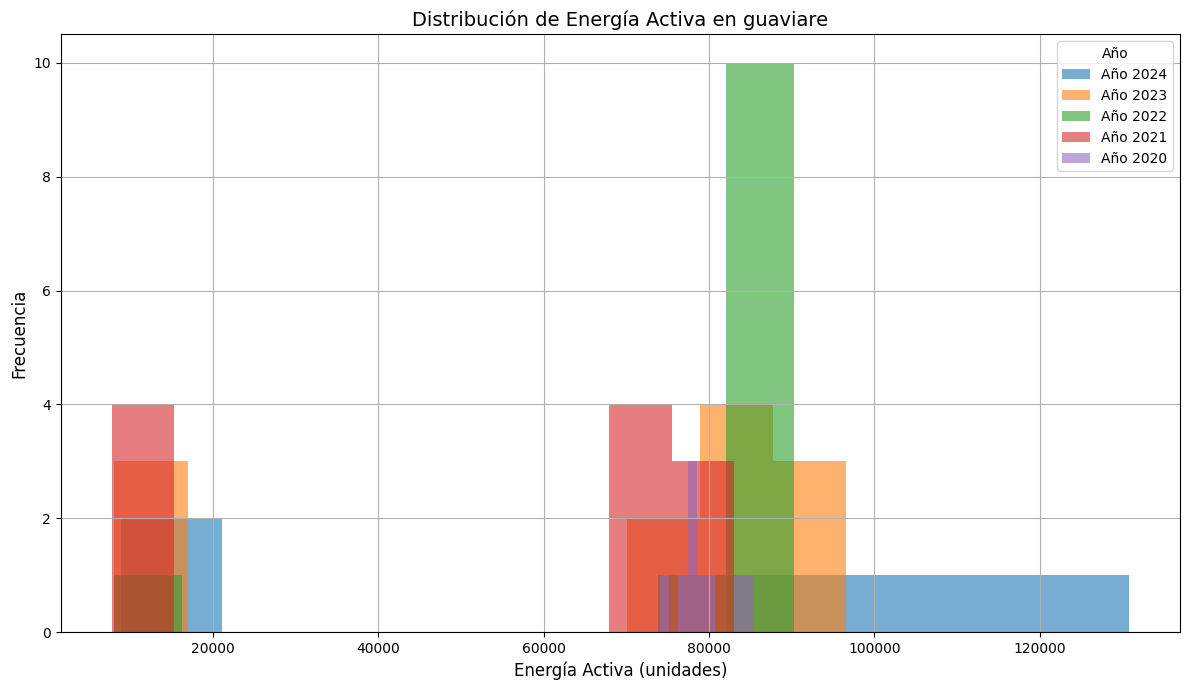

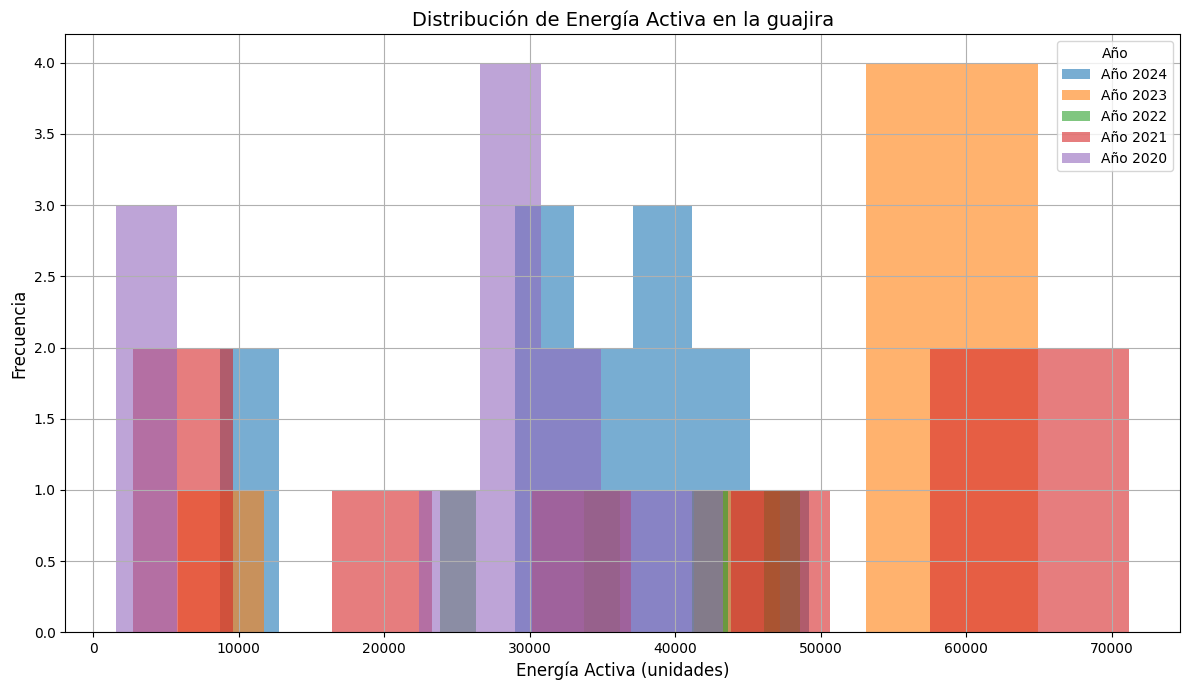

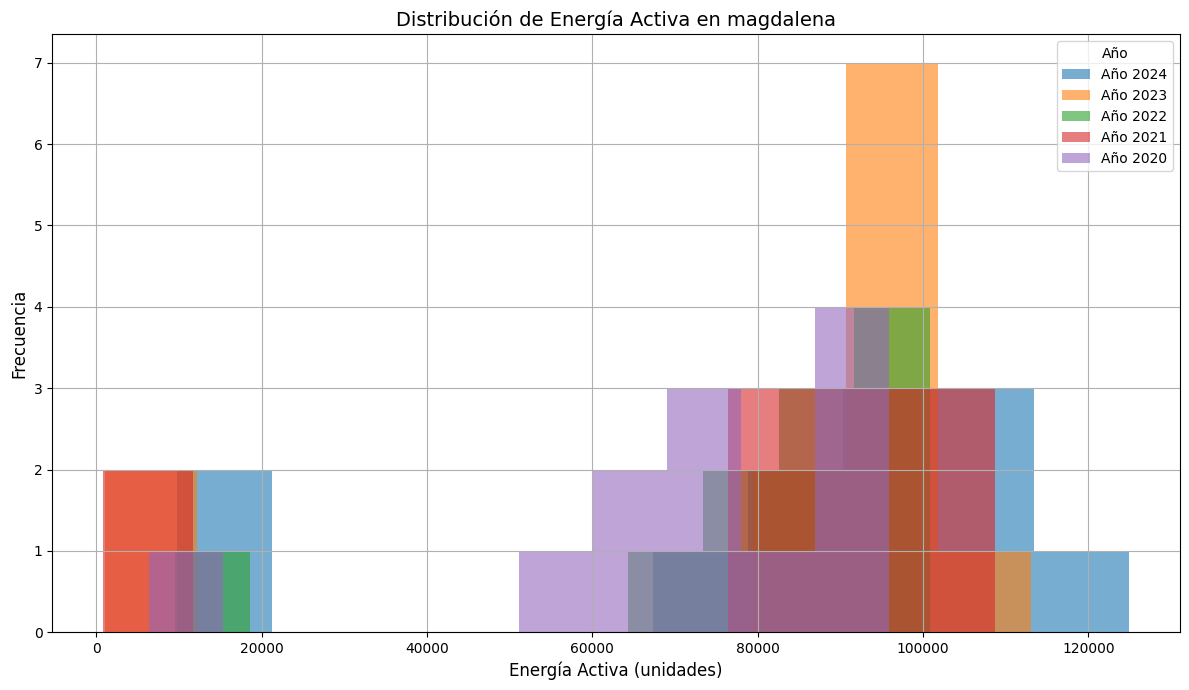

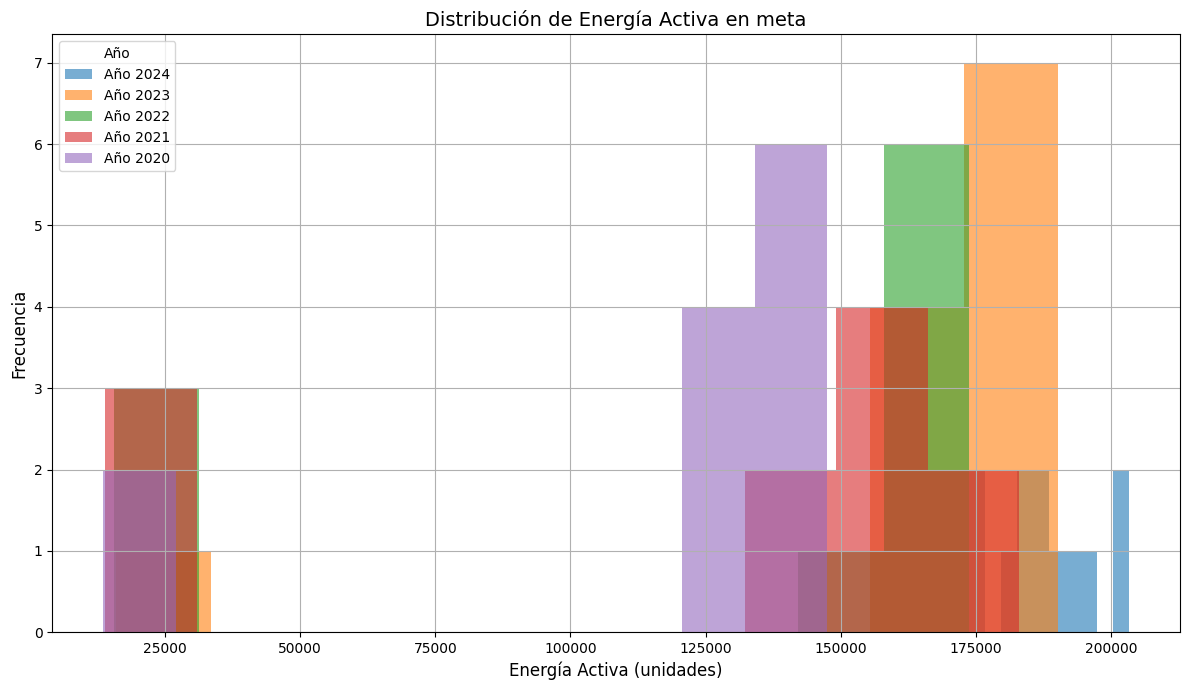

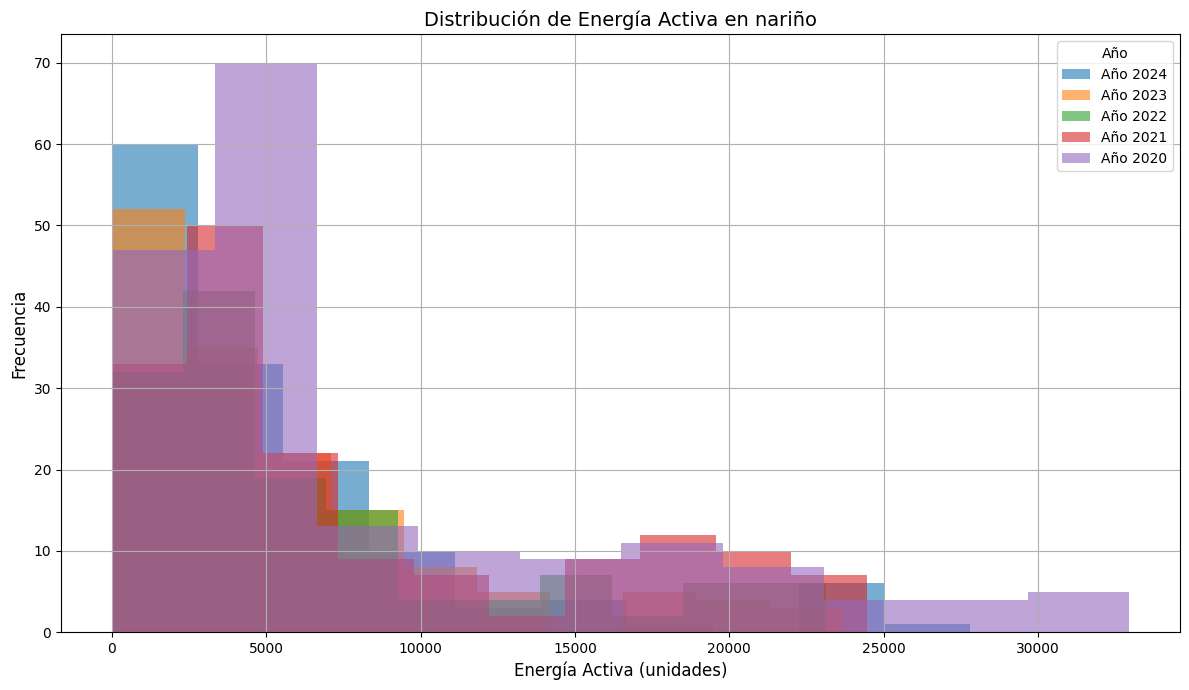

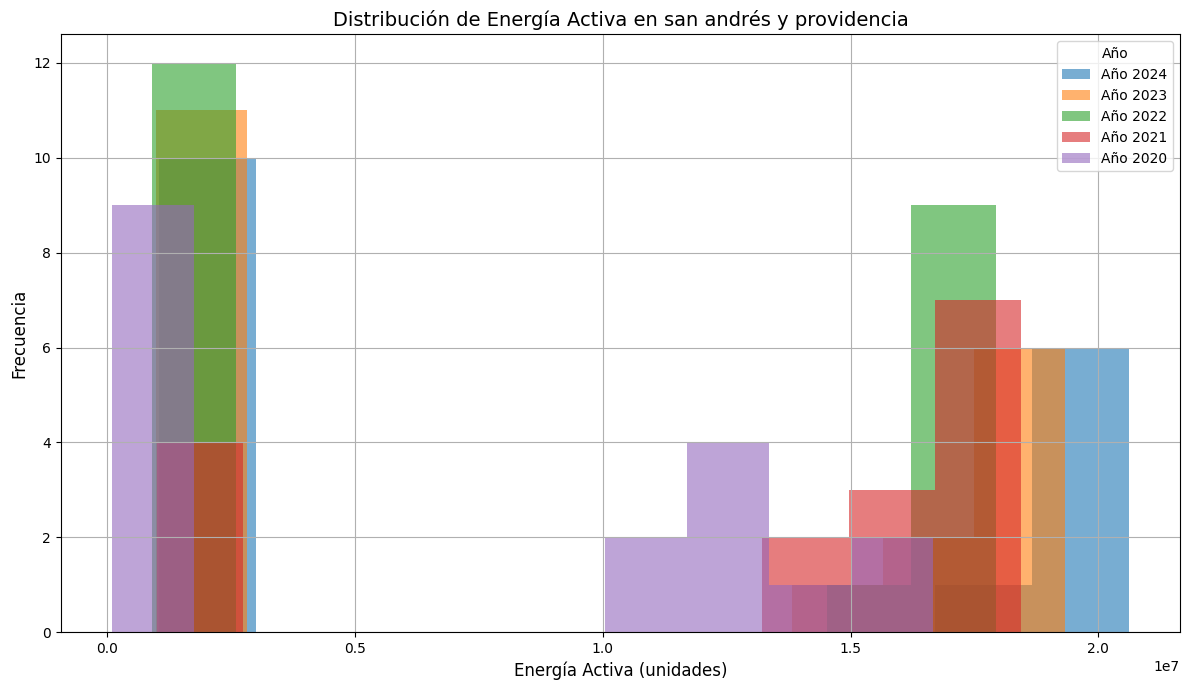

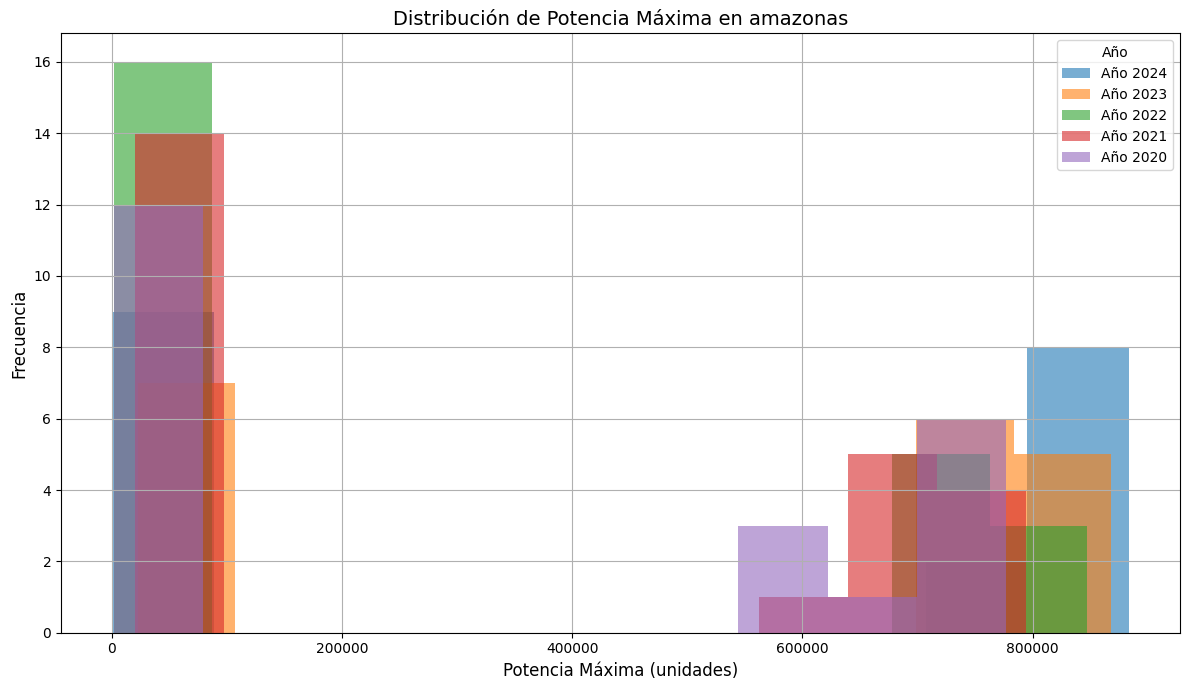

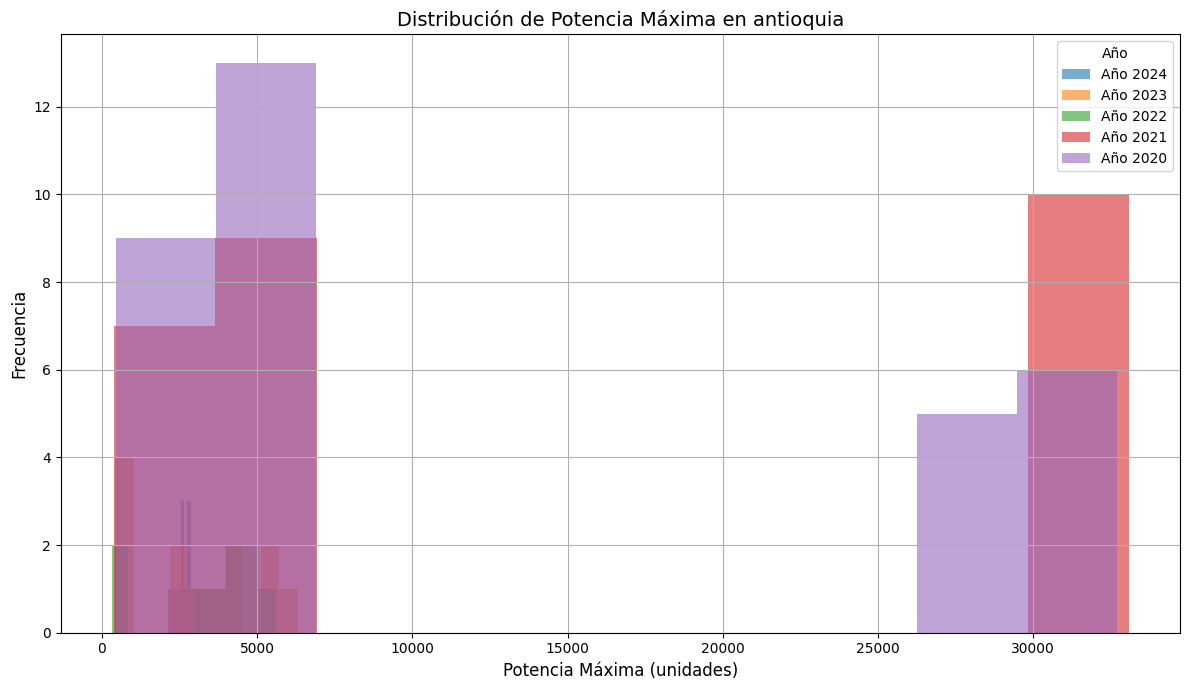

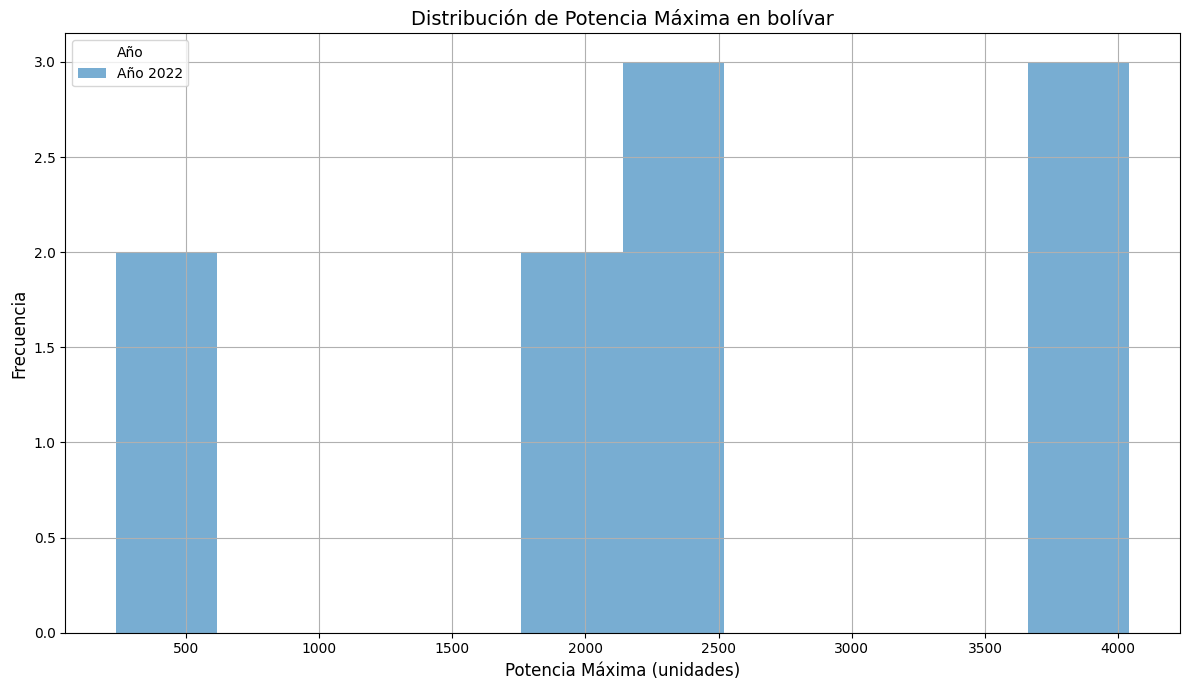

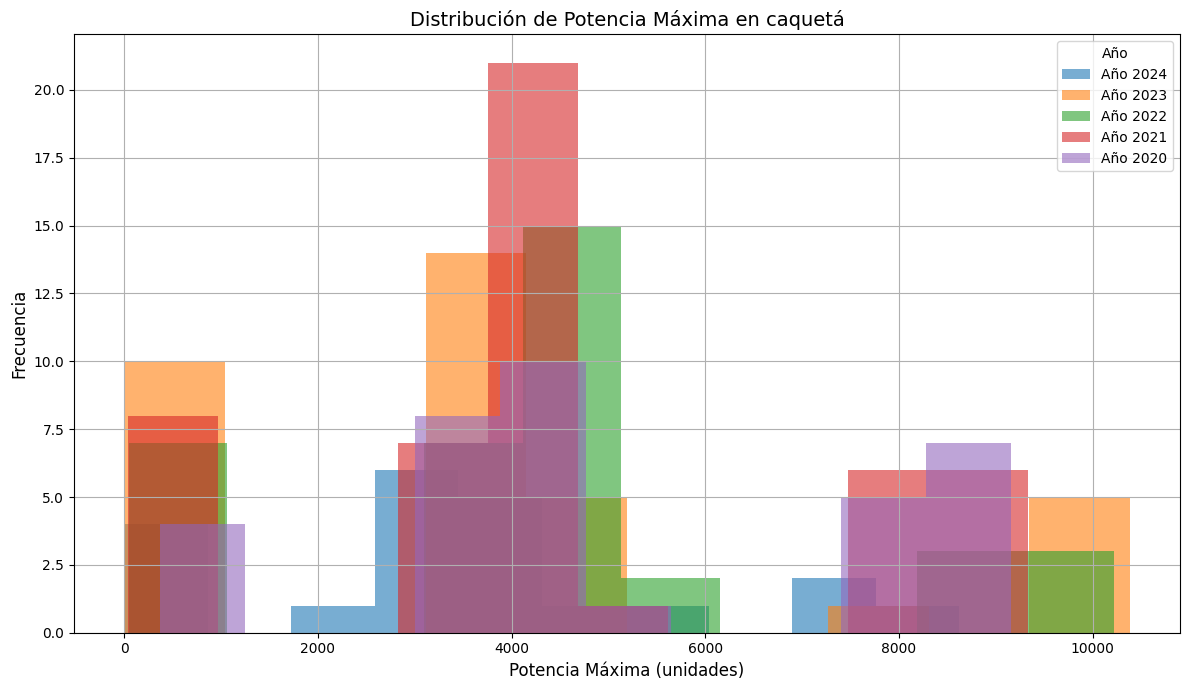

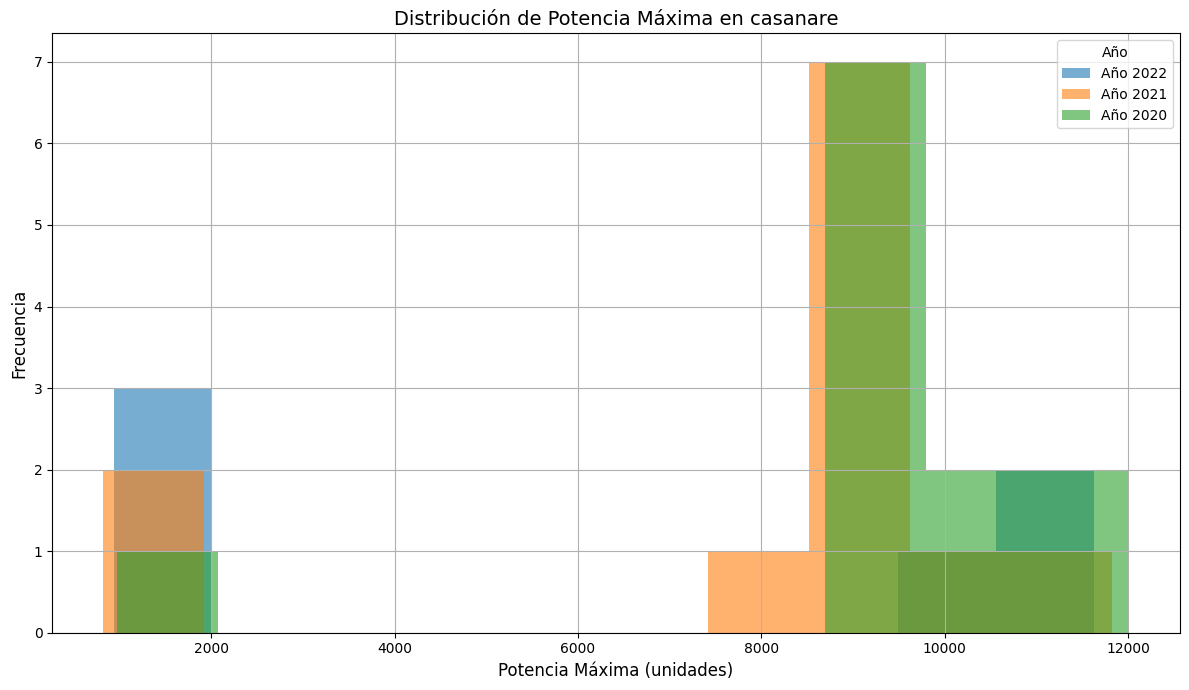

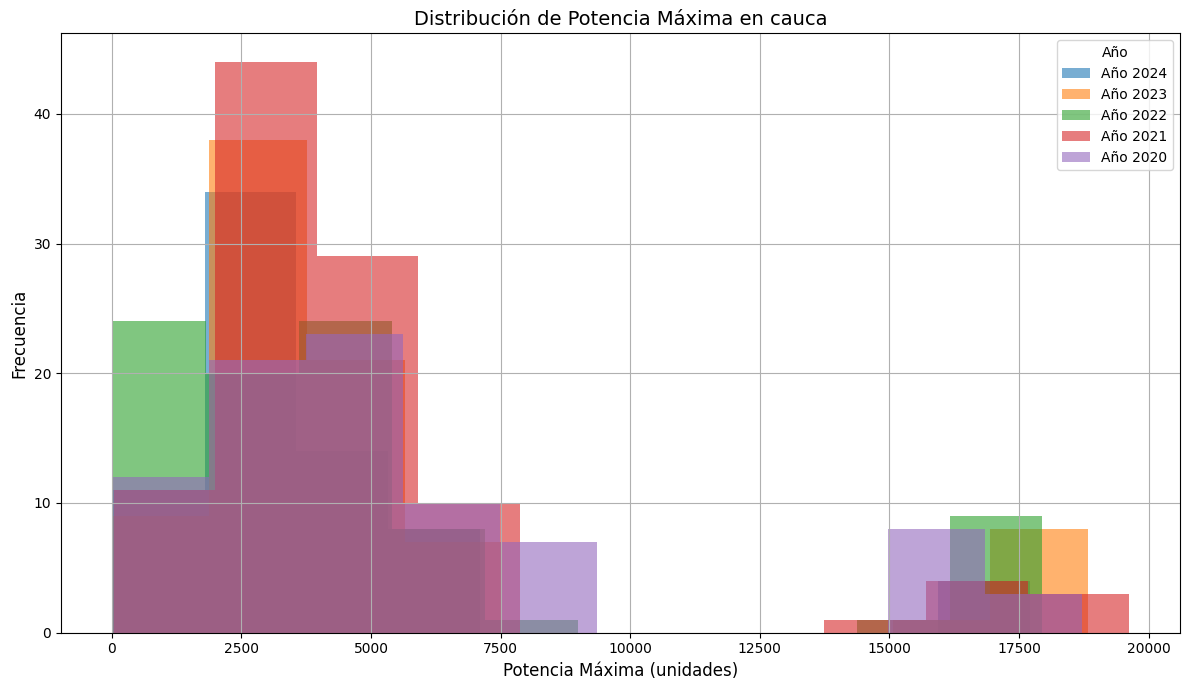

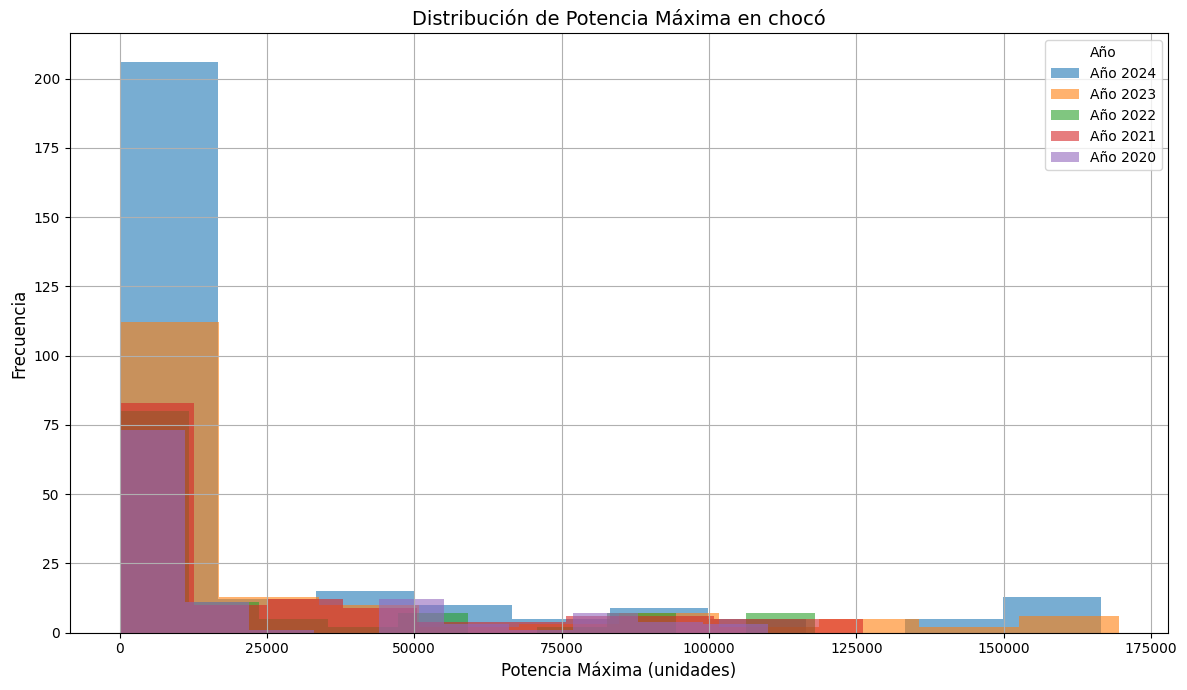

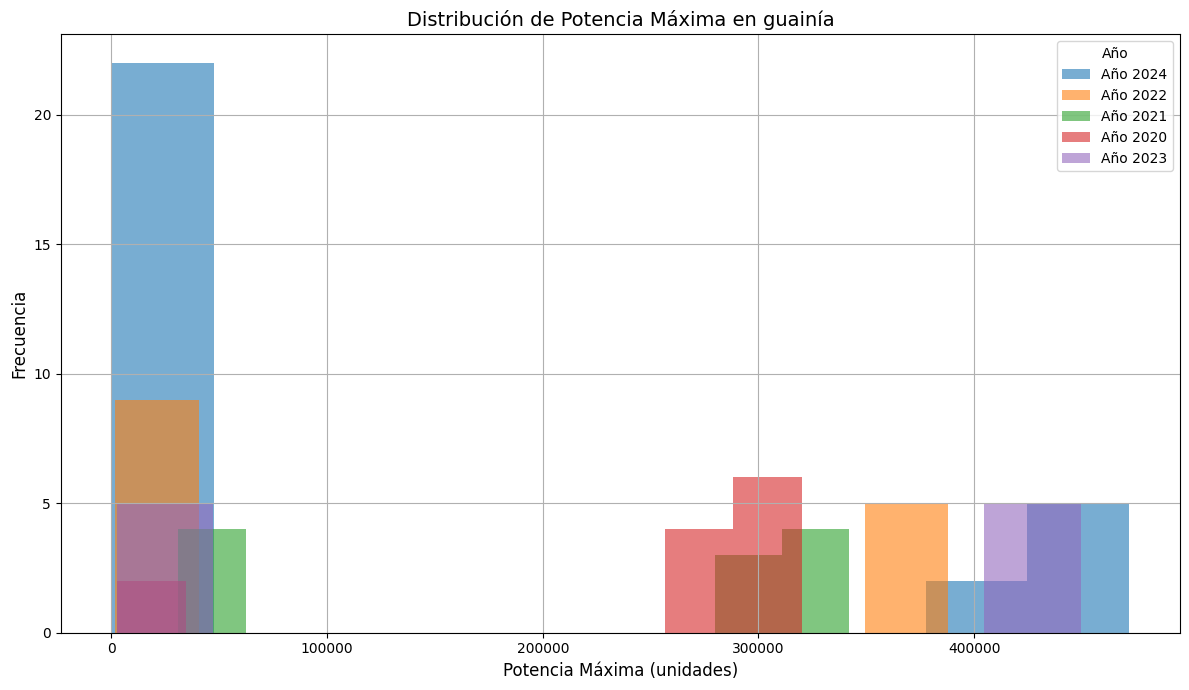

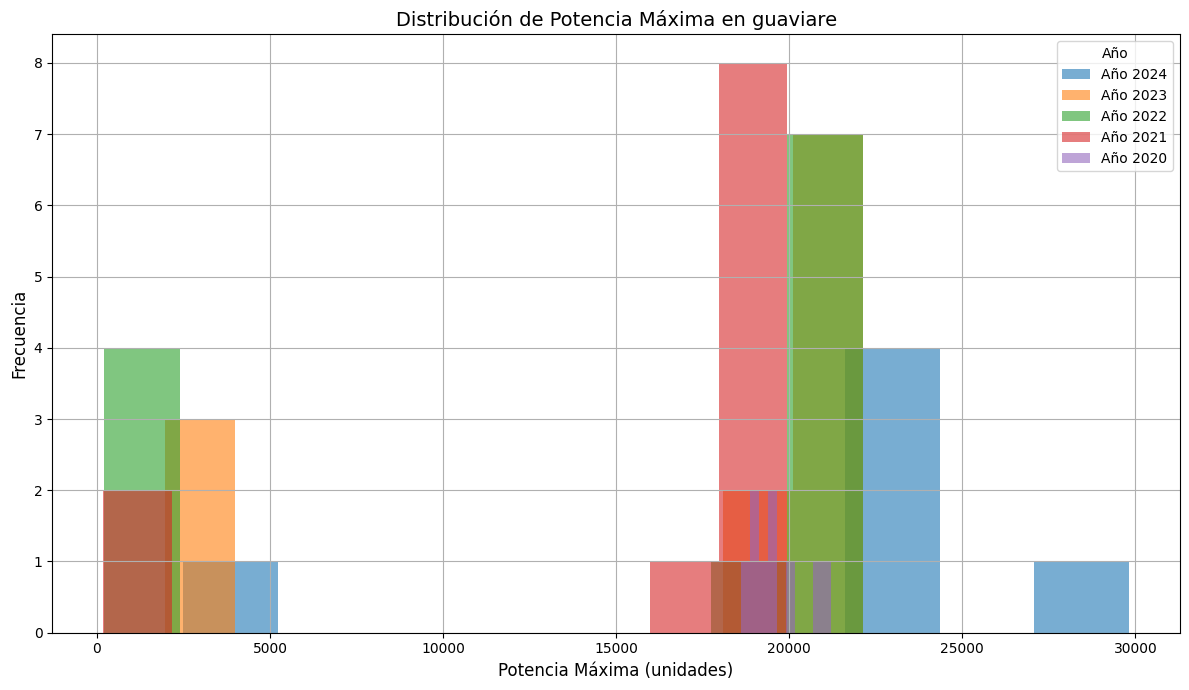

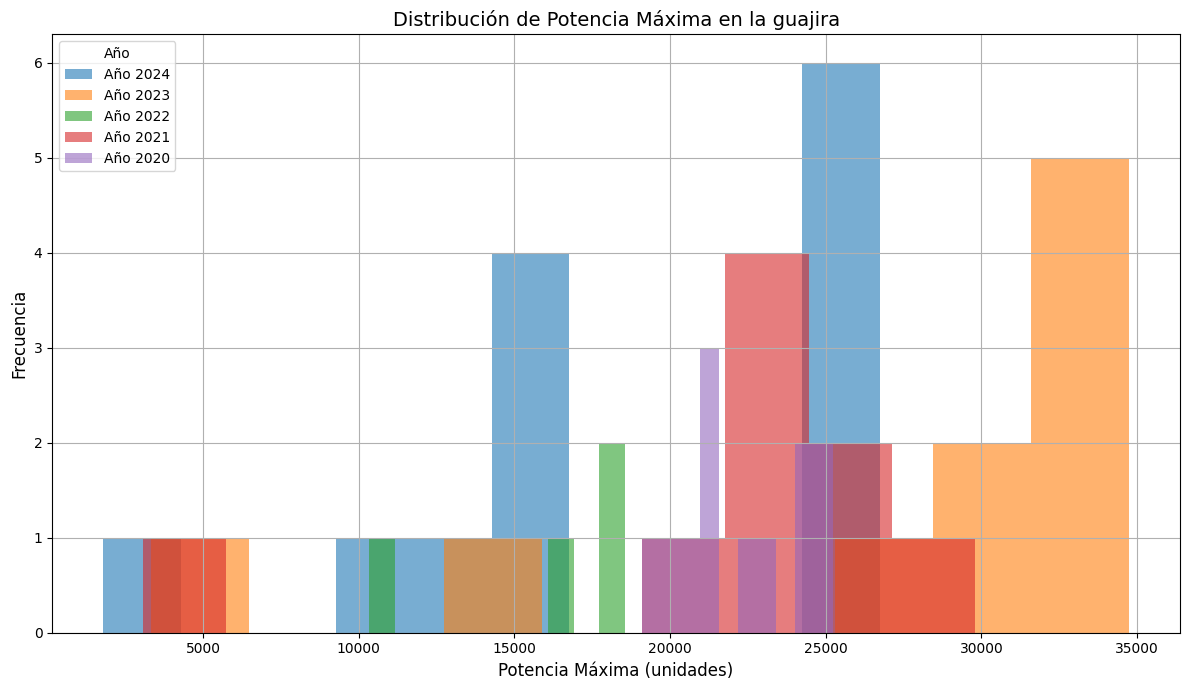

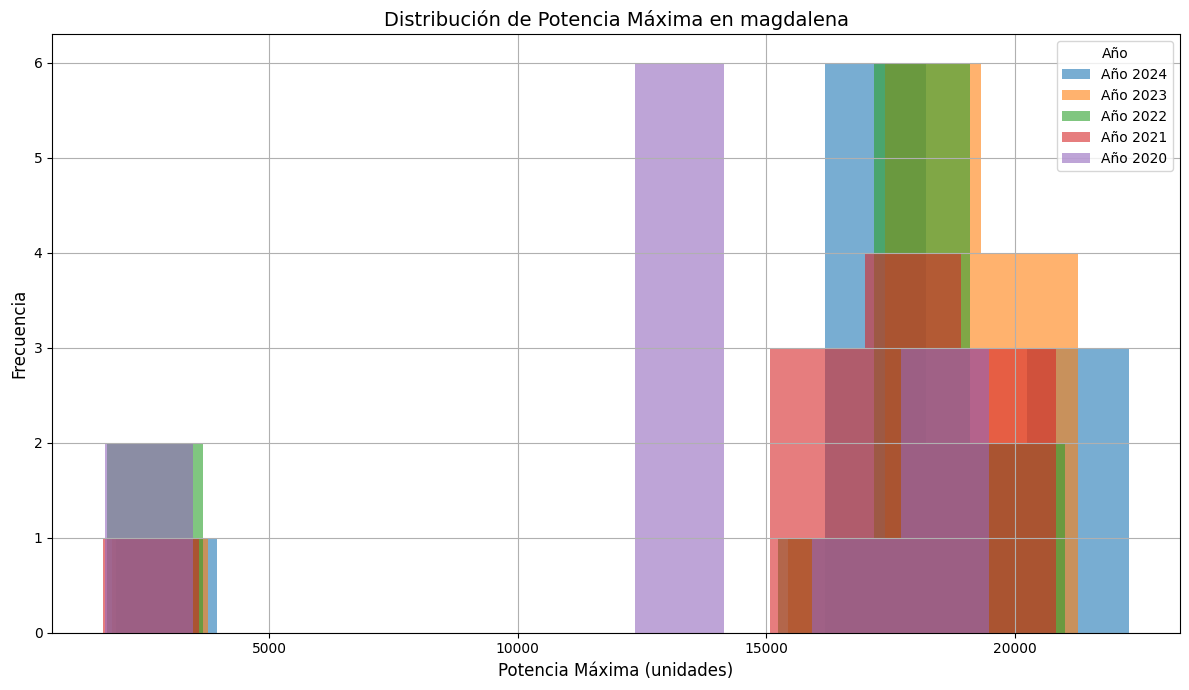

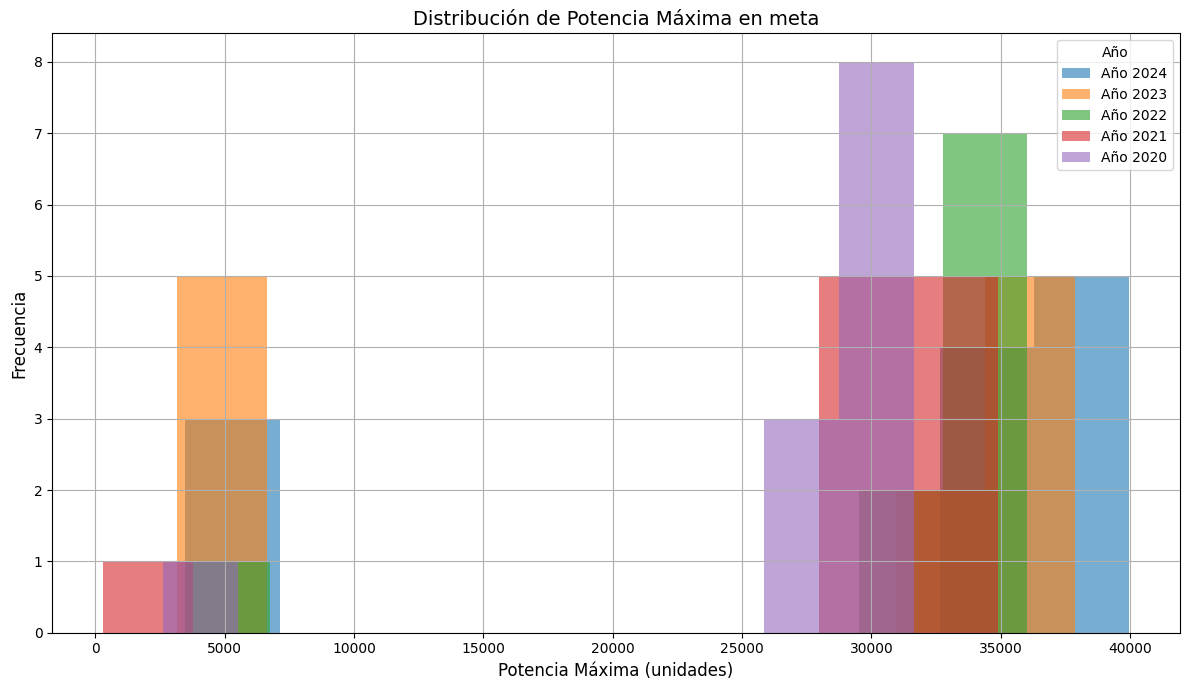

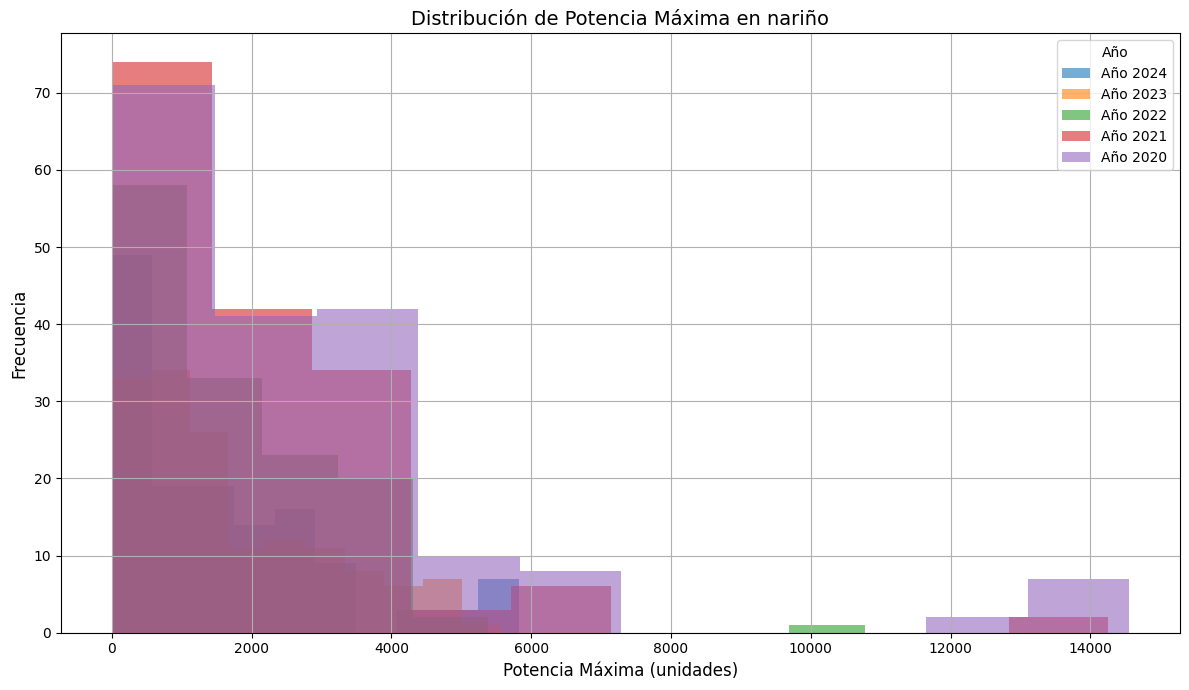

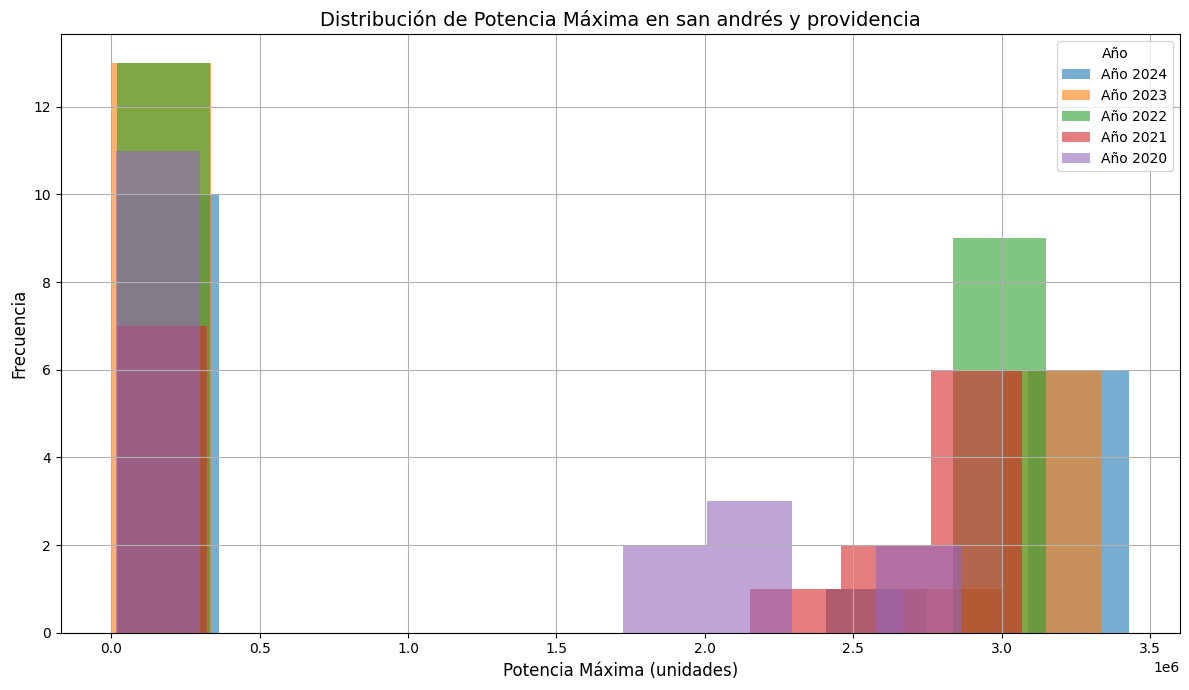

In [ ]:
# Filtrar los datos de Energía Activa y Potencia Máxima por Departamento y Año
data_histogramas = dataFrameZNI[['Anio', 'NombreDepartamento', 'EnergiaActiva', 'PotenciaMaxima']]

# Crear un histograma para cada departamento y diferenciar por año
departamentos = data_histogramas['NombreDepartamento'].unique()

for departamento in departamentos:
    plt.figure(figsize=(12, 7))
    datos_departamento = data_histogramas[data_histogramas['NombreDepartamento'] == departamento]

    # Iterar sobre cada año dentro del departamento
    anios = datos_departamento['Anio'].unique()
    for anio in anios:
        datos_anio = datos_departamento[datos_departamento['Anio'] == anio]
        plt.hist(
            datos_anio['EnergiaActiva'],
            bins=10,  # Número de intervalos
            alpha=0.6,  # Transparencia
            label=f'Año {anio}'
        )

    # Estilo de la gráfica
    plt.xlabel('Energía Activa (unidades)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.title(f'Distribución de Energía Activa en {departamento}', fontsize=14)
    plt.legend(title='Año')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Crear un histograma para Potencia Máxima, diferenciando departamentos y años
for departamento in departamentos:
    plt.figure(figsize=(12, 7))
    datos_departamento = data_histogramas[data_histogramas['NombreDepartamento'] == departamento]

    # Iterar sobre cada año dentro del departamento
    anios = datos_departamento['Anio'].unique()
    for anio in anios:
        datos_anio = datos_departamento[datos_departamento['Anio'] == anio]
        plt.hist(
            datos_anio['PotenciaMaxima'],
            bins=10,
            alpha=0.6,
            label=f'Año {anio}'
        )

    # Estilo de la gráfica
    plt.xlabel('Potencia Máxima (unidades)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.title(f'Distribución de Potencia Máxima en {departamento}', fontsize=14)
    plt.legend(title='Año')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


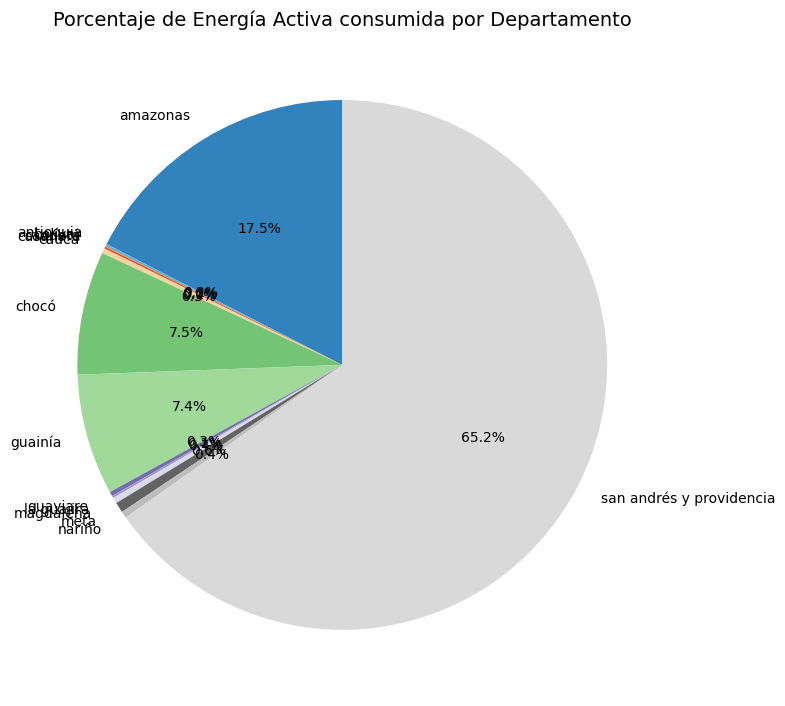

In [ ]:
# Agrupar por departamento y sumar la Energía Activa
data_por_departamento = dataFrameZNI.groupby('NombreDepartamento')['EnergiaActiva'].sum()

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
data_por_departamento.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20c')

# Estilo de la gráfica
plt.title('Porcentaje de Energía Activa consumida por Departamento', fontsize=14)
plt.ylabel('')  # Eliminar el título del eje Y
plt.tight_layout()
plt.show()


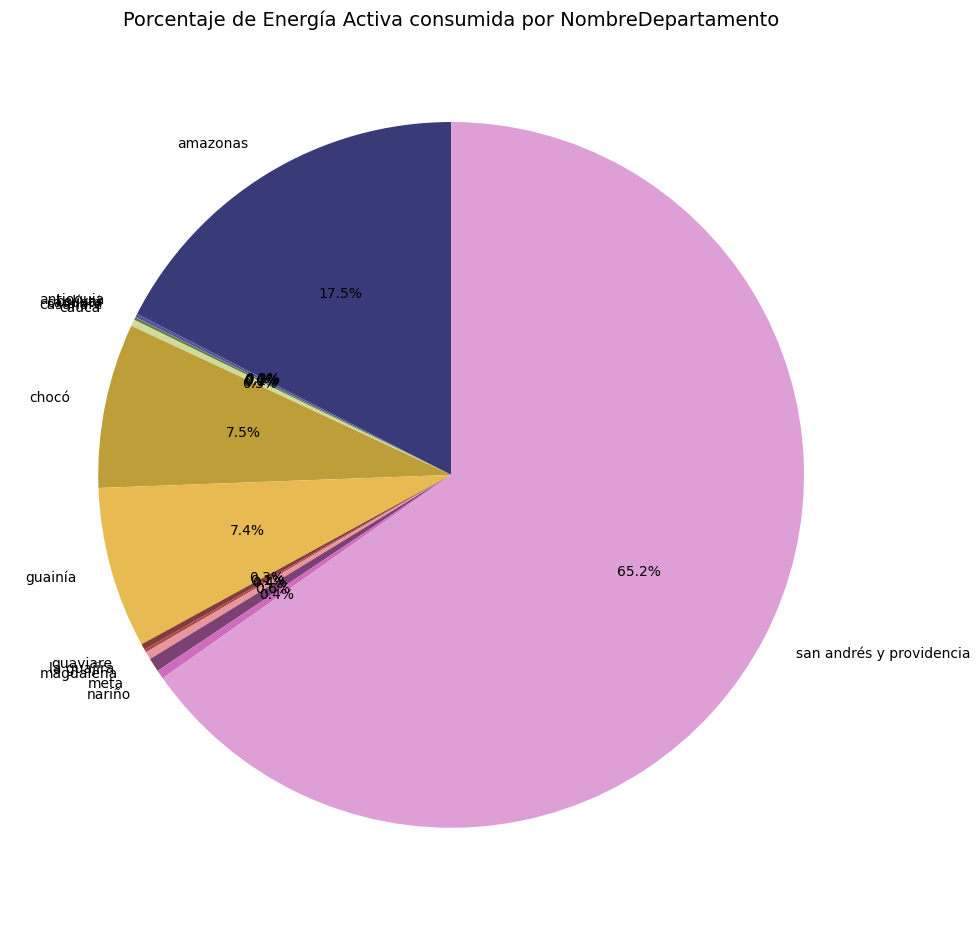

In [ ]:
# Agrupar por municipio y sumar la Energía Activa
data_por_municipio = dataFrameZNI.groupby('NombreDepartamento')['EnergiaActiva'].sum()

# Crear la gráfica de pastel
plt.figure(figsize=(10, 10))
data_por_municipio.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20b')

# Estilo de la gráfica
plt.title('Porcentaje de Energía Activa consumida por NombreDepartamento', fontsize=14)
plt.ylabel('')  # Eliminar el título del eje Y
plt.tight_layout()
plt.show()


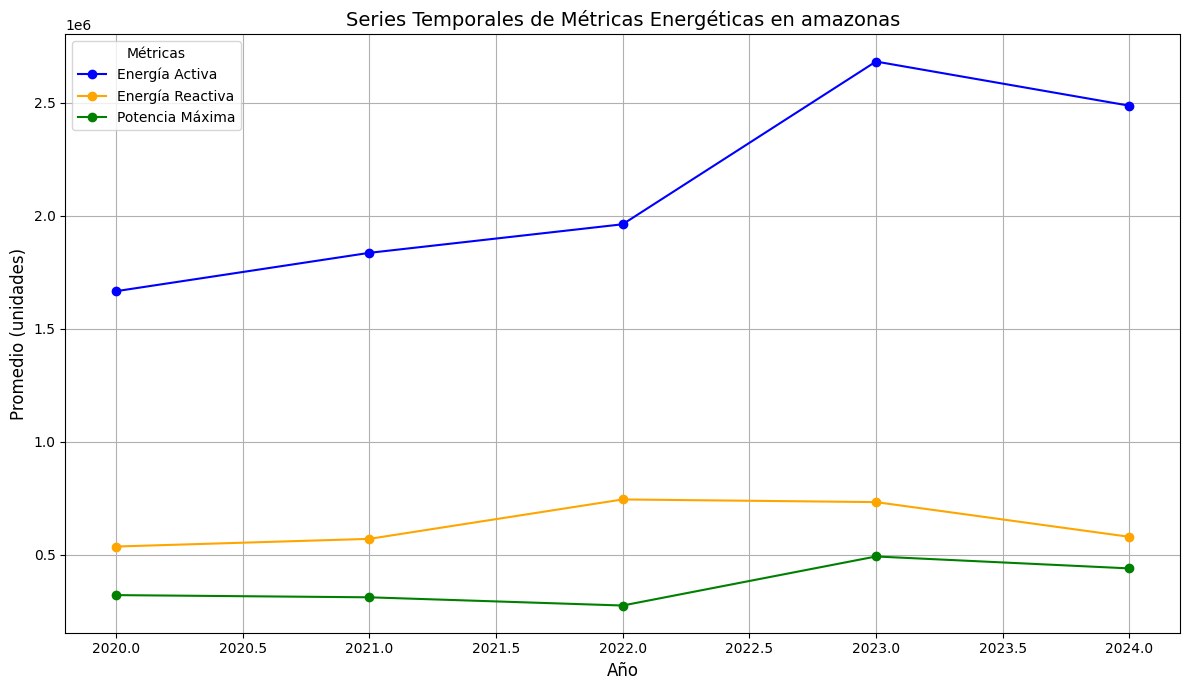

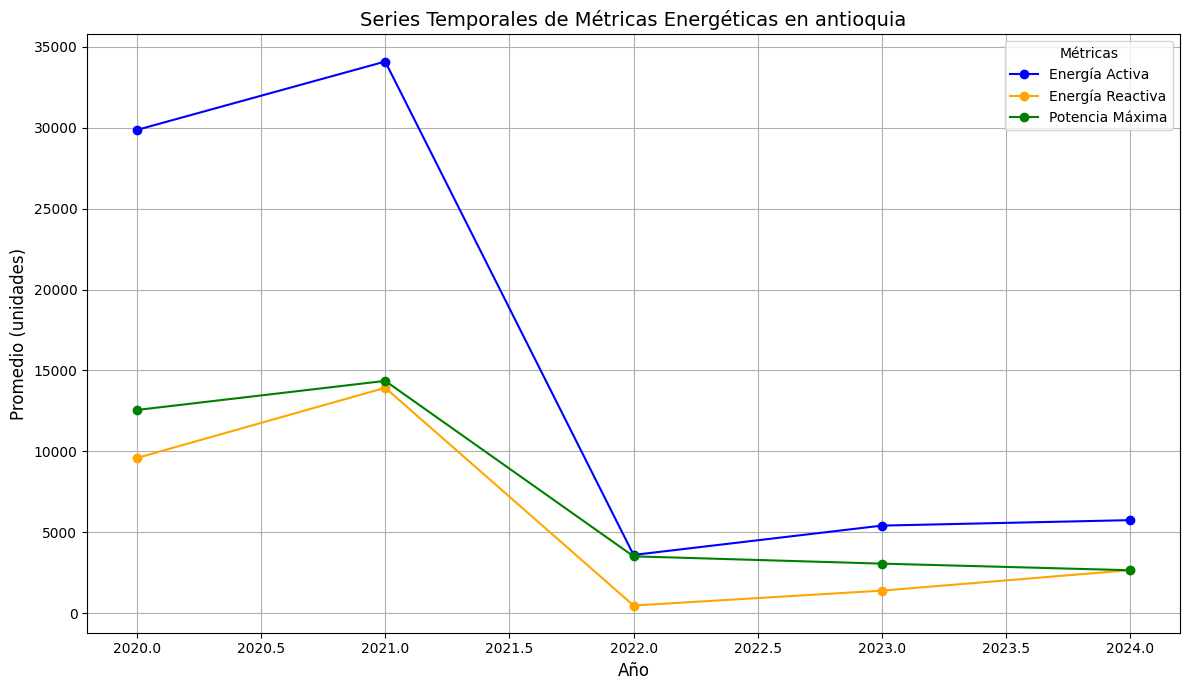

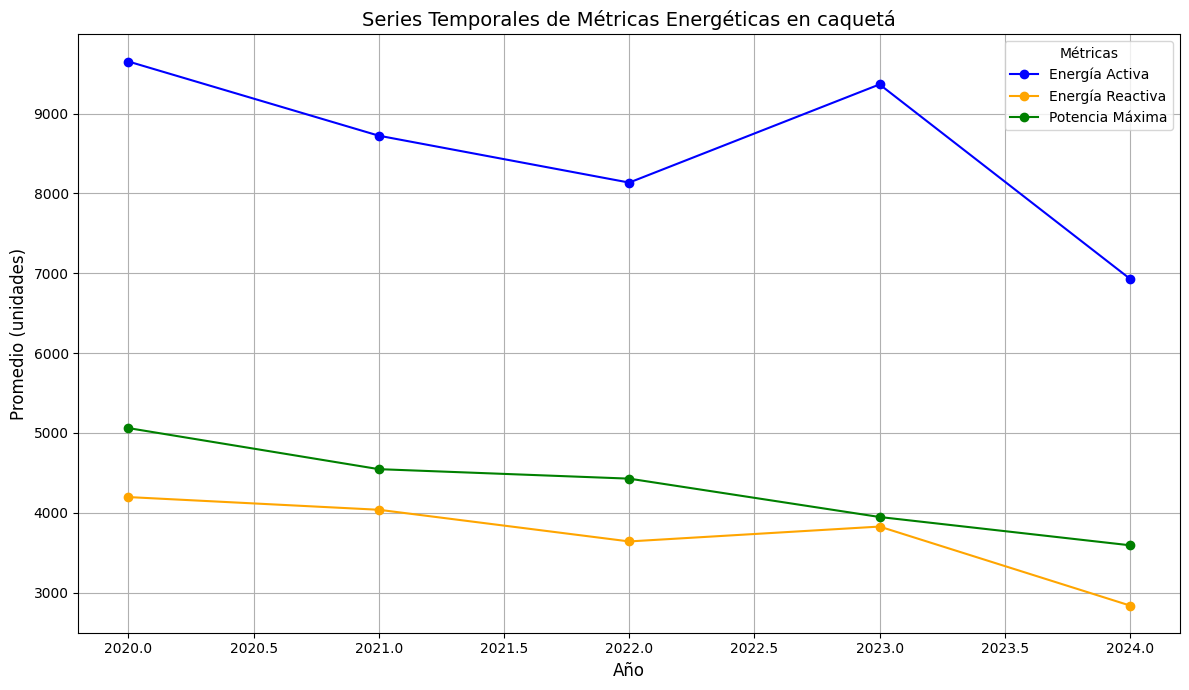

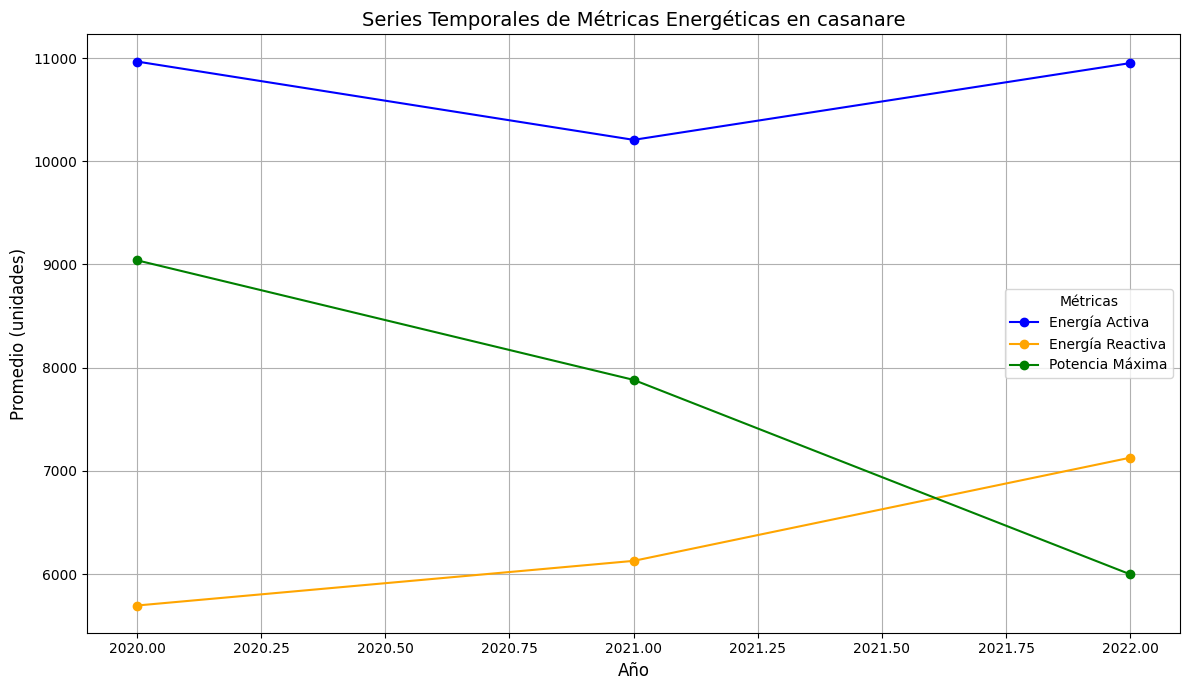

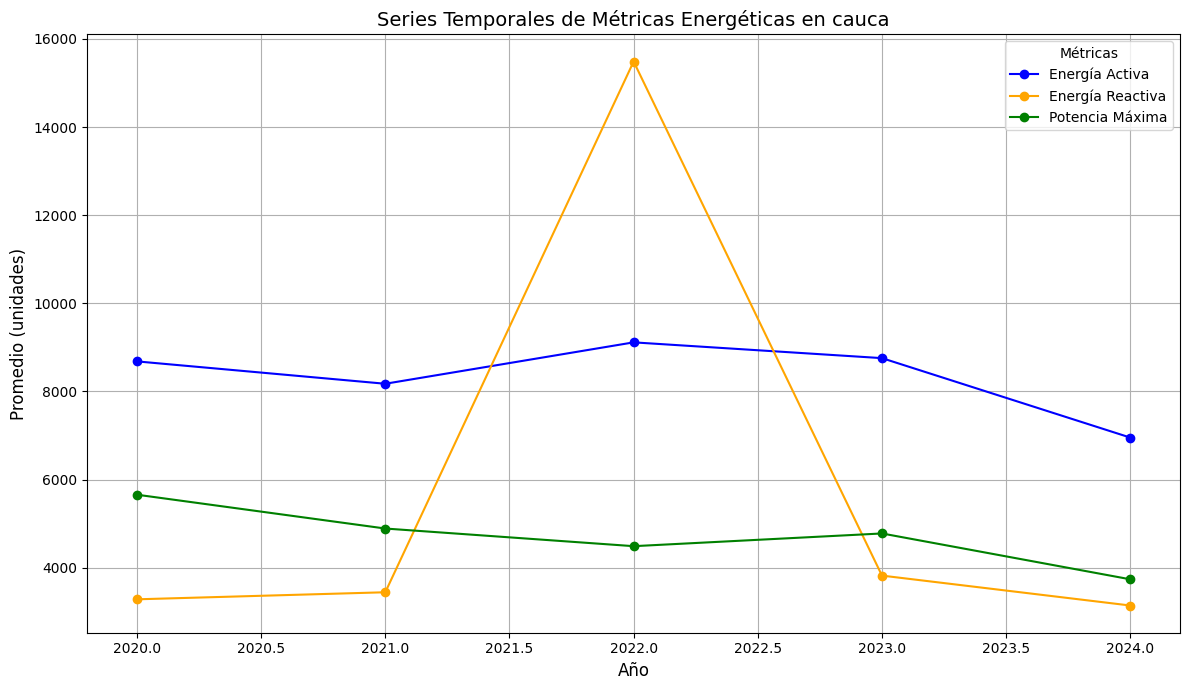

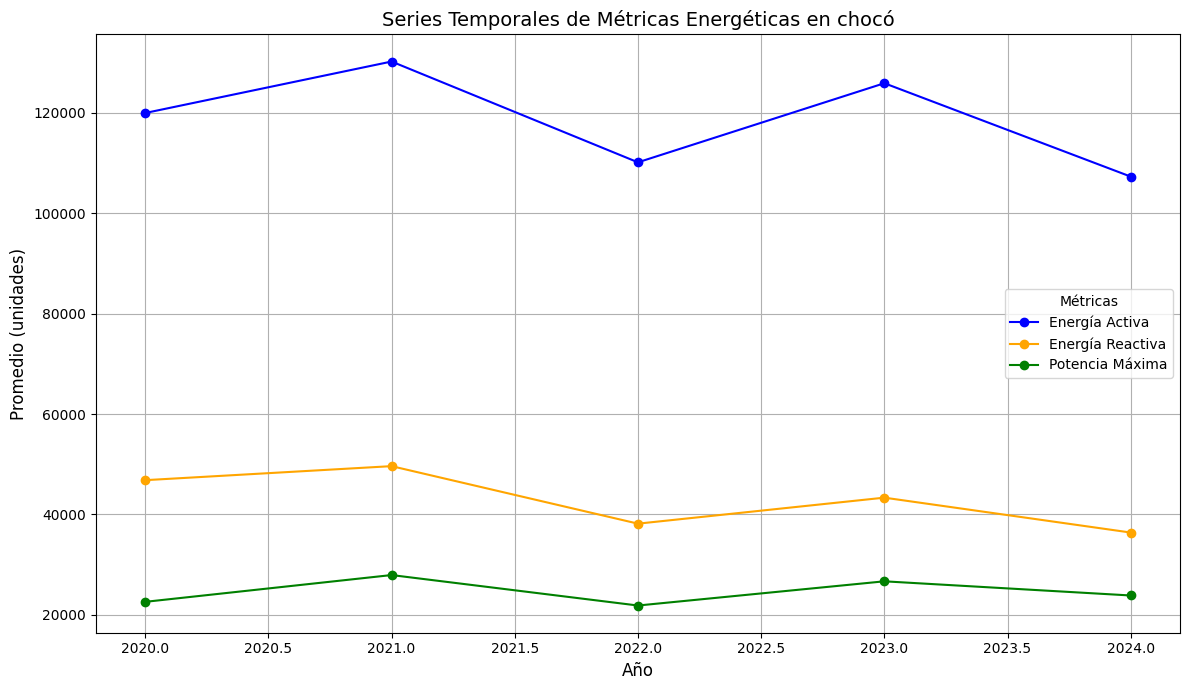

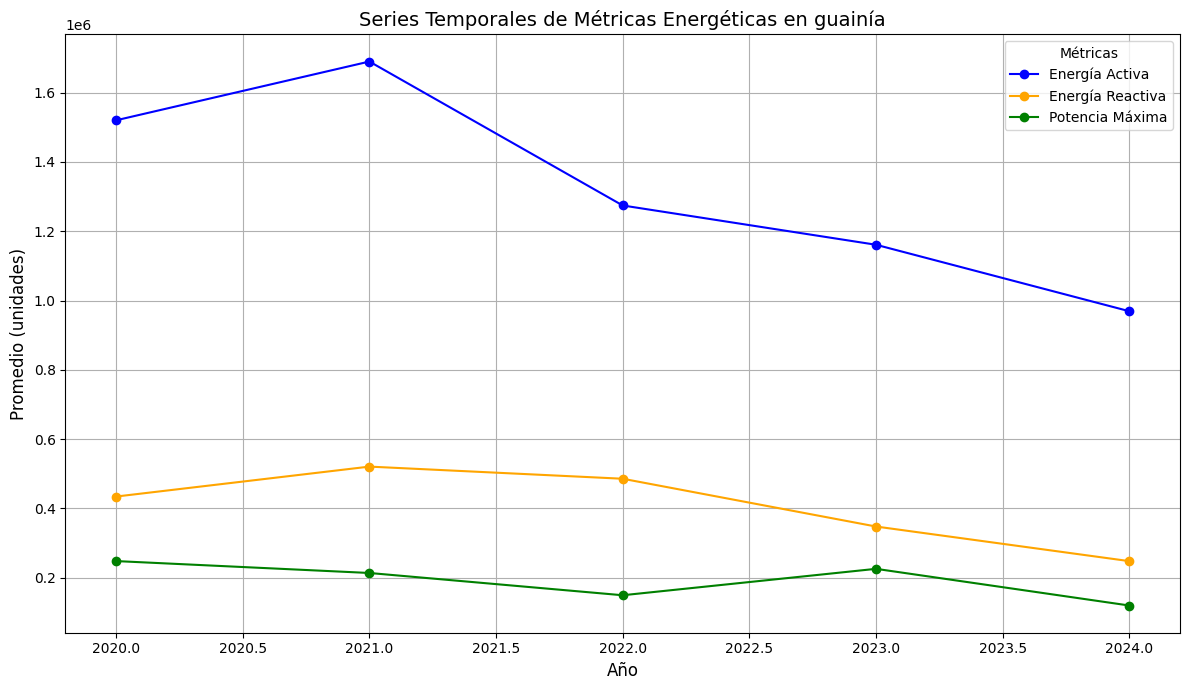

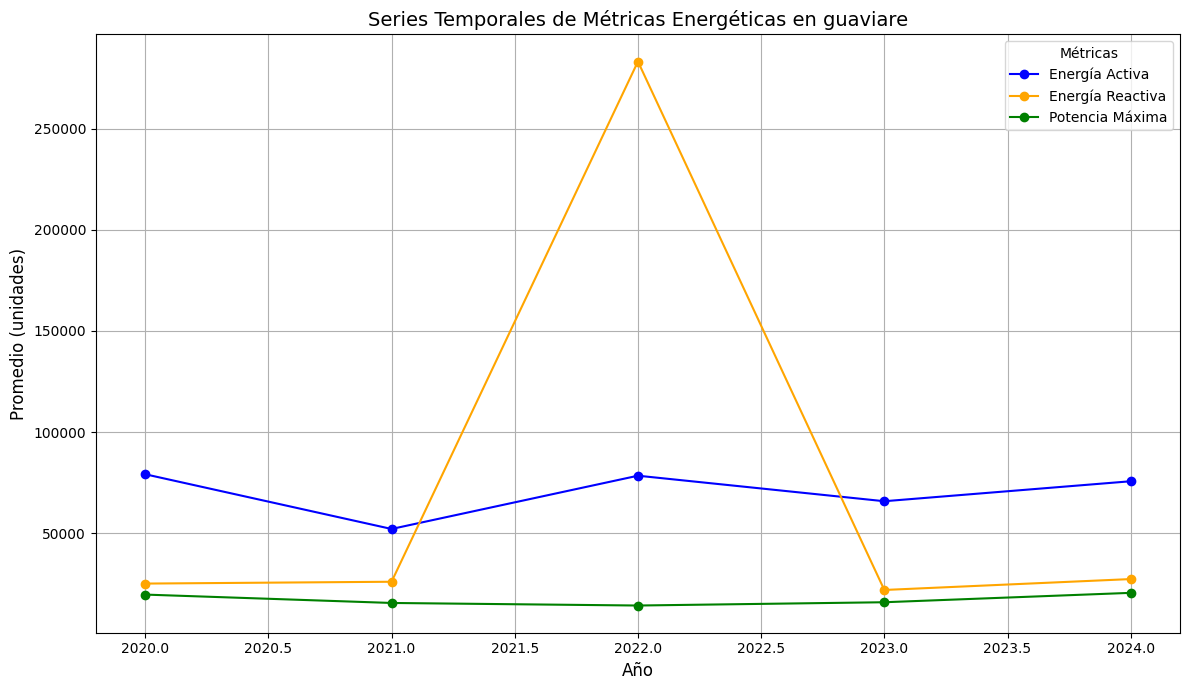

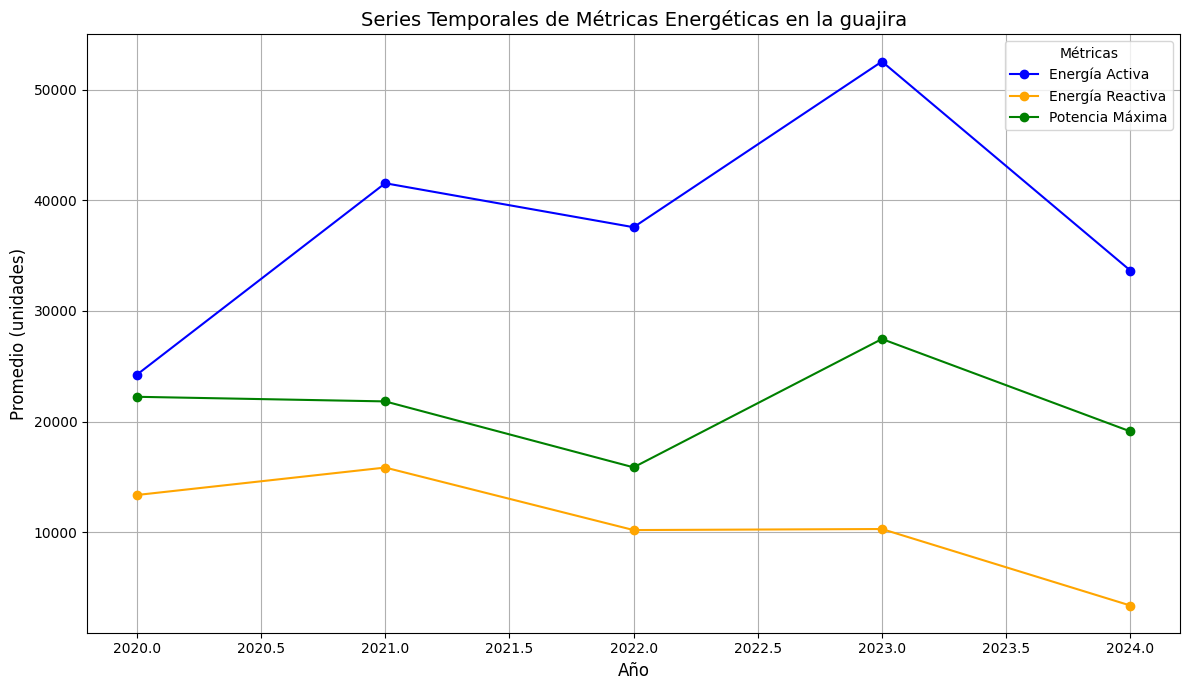

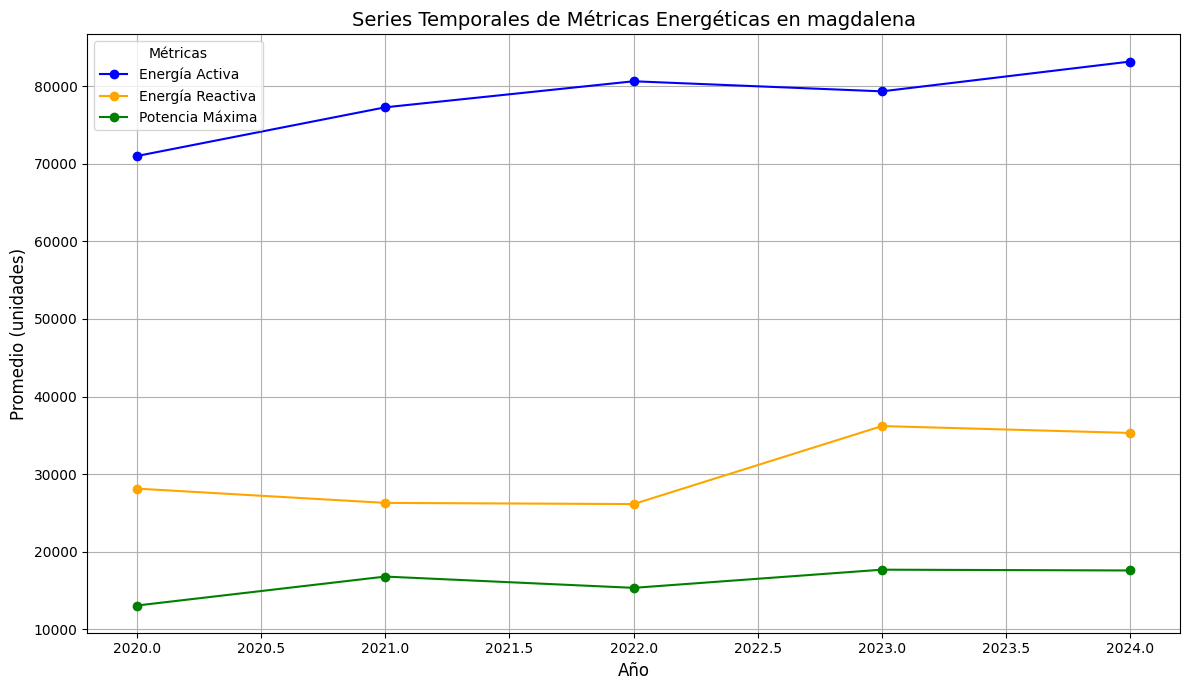

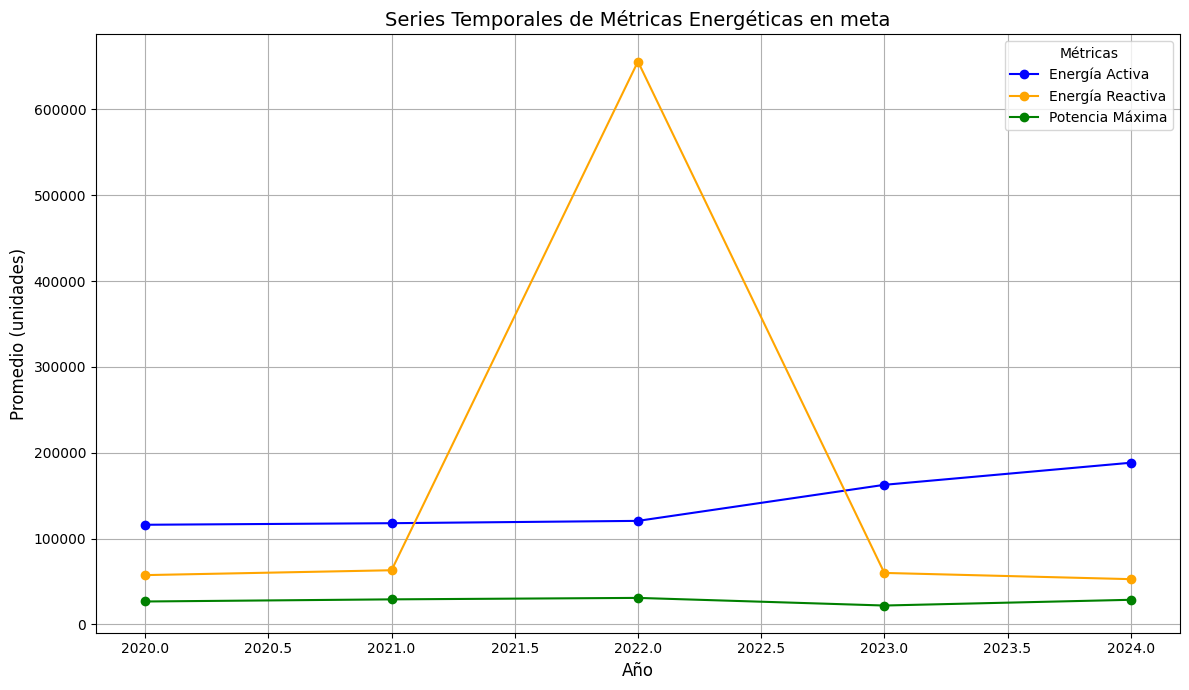

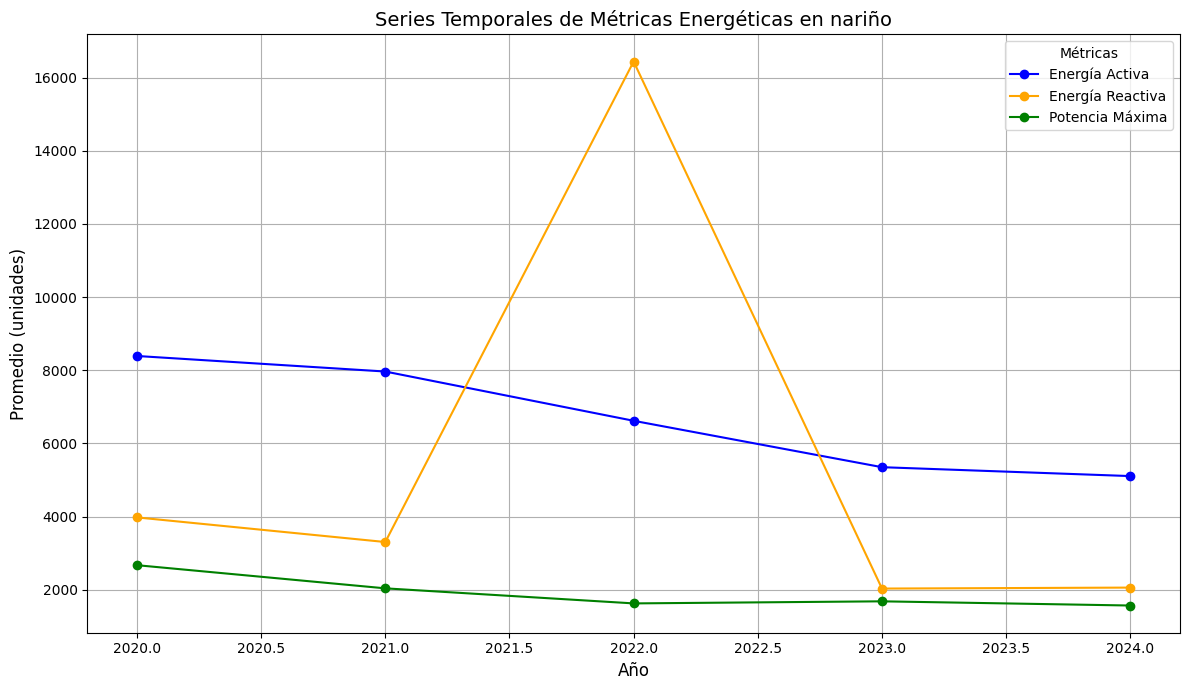

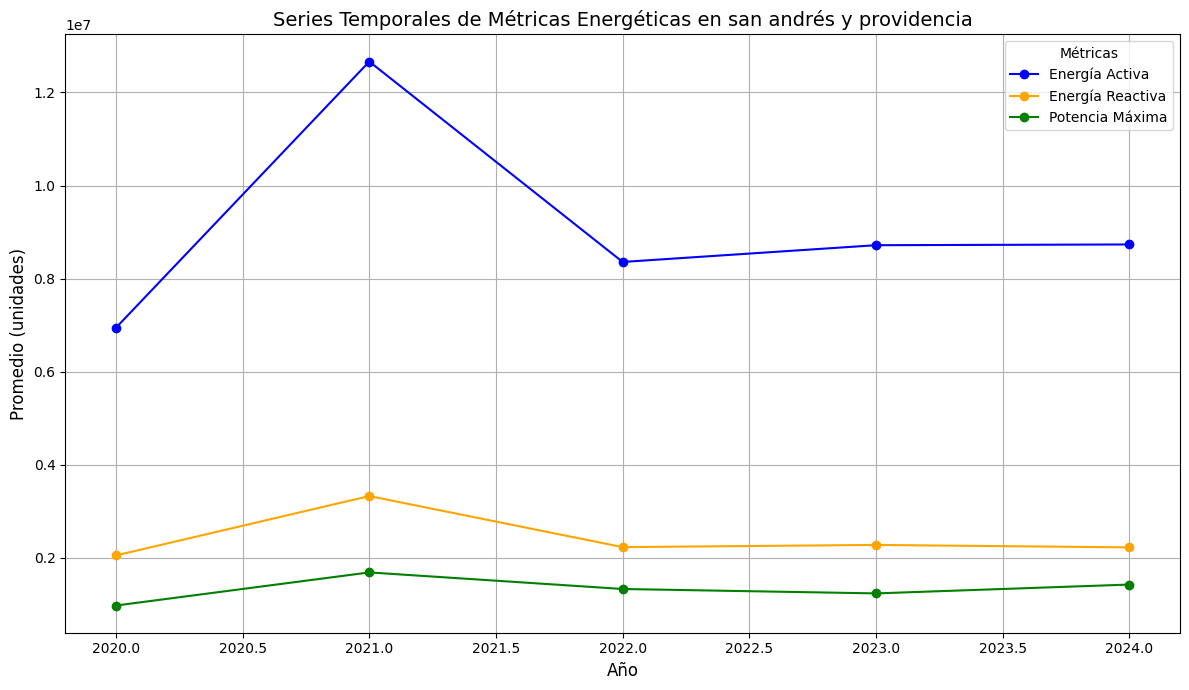

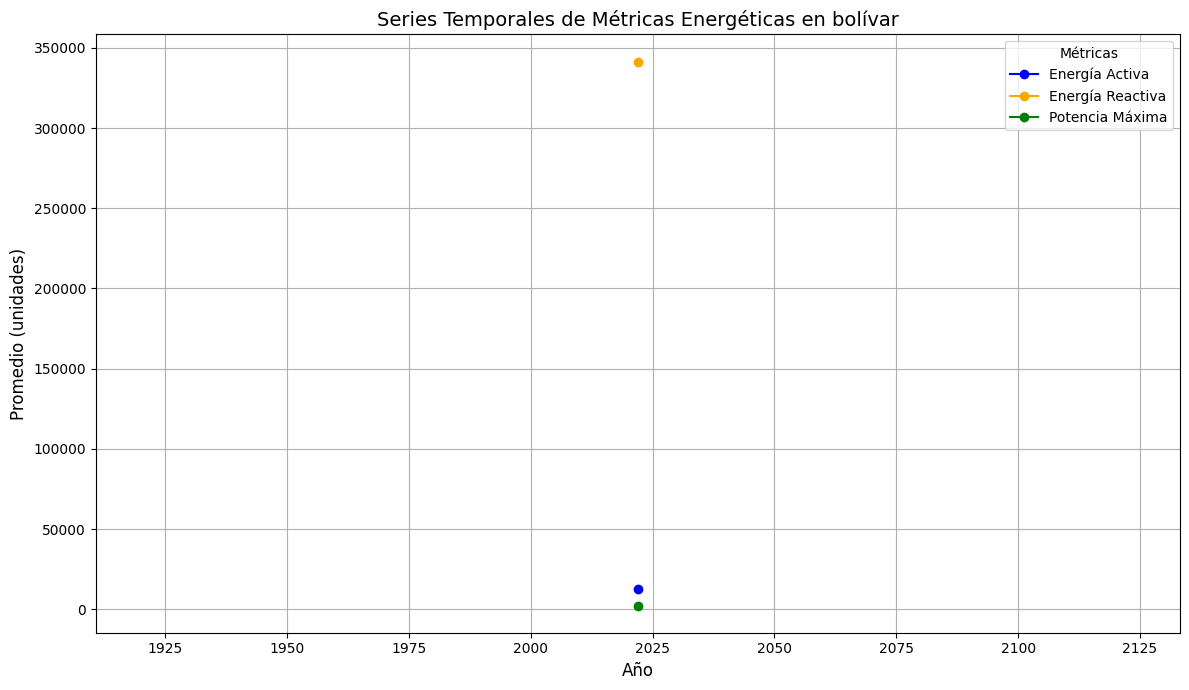

In [ ]:
# Agrupar los datos por Año y Departamento, calculando el promedio de cada métrica
data_series_temporales = dataFrameZNI.groupby(['Anio', 'NombreDepartamento'])[['EnergiaActiva', 'EnergiaReactiva', 'PotenciaMaxima']].mean().reset_index()

# Crear la gráfica combinada para cada departamento
departamentos = data_series_temporales['NombreDepartamento'].unique()

for departamento in departamentos:
    # Filtrar los datos para el departamento específico
    datos_departamento = data_series_temporales[data_series_temporales['NombreDepartamento'] == departamento]

    # Crear la figura
    plt.figure(figsize=(12, 7))

    # Trazar Energía Activa
    plt.plot(datos_departamento['Anio'], datos_departamento['EnergiaActiva'], marker='o', label='Energía Activa', color='blue')

    # Trazar Energía Reactiva
    plt.plot(datos_departamento['Anio'], datos_departamento['EnergiaReactiva'], marker='o', label='Energía Reactiva', color='orange')

    # Trazar Potencia Máxima
    plt.plot(datos_departamento['Anio'], datos_departamento['PotenciaMaxima'], marker='o', label='Potencia Máxima', color='green')

    # Estilo de la gráfica
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Promedio (unidades)', fontsize=12)
    plt.title(f'Series Temporales de Métricas Energéticas en {departamento}', fontsize=14)
    plt.legend(title='Métricas')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
